In [1]:
###################################################################################################################################
###################################################################################################################################
###  
###  Case Study Name        :  Bike Rental Assignment (Linear Regression)
###
###  Case Study Goal        :  The primary goal of this case study was to build a robust linear regression model for predicting bike rental counts using a set of environmental and temporal features.                
###
###  Author                 :  Saurabh Tayde
###
###  Email                  :  saurabhtayde2810@gmail.com
###              
###################################################################################################################################
###################################################################################################################################

#######################
## Problem Statement
#######################

BoomBikes, a US bike-sharing provider, has seen a significant drop in revenue due to the Corona pandemic.  They're looking to create a business plan to boost revenue post-pandemic and have hired a consulting company to help.  The goal is to understand the factors influencing the demand for shared bikes in the American market.S
Specifically, BoomBikes wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

To achieve this, they've collected a large dataset on daily bike demand based on various factors, including meteorological information and user behavior.

###################
## Business Goal
###################

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

######
#################
# Contents
#################

######

* **1. Data Exploration** <br><br>
    * 1.1 Data Dictionary
    * 1.2 Importing Libraries
    * 1.3 Understanding Data <br><br>

* **2. Exploratory Data Analysis (EDA)** <br><br>
    * 2.1 Dropping Uninformative Features
    * 2.2 Outlier Detection and Removal
    * 2.3 Add actual category names to categorical values
    * 2.4 Univariate Data Analysis
    * 2.5 Bivariate Data Analysis
    * 2.6 Pair Plot Generation
    * 2.7 Correlation Analysis <br><br>

* **3. Feature Engineering (Creating Dummy Variables for Categorical Predictors)** <br><br>

* **4. Train, Test Split** <br><br>

* **5. Feature Scaling** <br><br>

* **6. Model Building** <br><br>
    * 6.1 Split `df_train` into `X_train` and `y_train`
    * 6.2 Dimensionality Reduction: Recursive Feature Elimination (RFE)
    * 6.3 Building Model 1
    * 6.4 Building Model 2
    * 6.5 Building Model 3
    * 6.6 Building Model 4
    * 6.7 Building Model 5 <br><br>

* **7. Model Evaluation (Training Data)** <br><br>
    * 7.1 Residual Analysis on Training data
        * * Distribution of Error Terms Plot
        * * Component Plus Residual Plot (CCPR) for "temp"
        * * Validating Homoscedasticity
        * * Actual vs. Predicted Values (Training Data)
    * 7.2 Validating Multicollinearity <br><br>

* **8. Model Evaluation (Test Data)** <br><br>
    * 8.1 Actual vs Predicted (y_test vs y_pred)
    * 8.2 R-squared and Adjusted R-squared (test data) <br><br>

* **9. Conclusion**

<br>

############################

######
# 1. Data Exploration
######

############################

#####################
### 1.1 Data Dictionary
#####################

######

* instant: record index
* dteday : date
* season : season (1:spring, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2018, 1:2019)
* mnth : month ( 1 to 12)
* holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit : 
	* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : temperature in Celsius
* atemp: feeling temperature in Celsius
* hum: humidity
* windspeed: wind speed
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

######

############################
### 1.2 Importing Libraries
############################

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

############################
### 1.3 Understanding Data
############################

In [3]:
# Loading Data

bike_data = pd.read_csv('day.csv')

In [4]:
# Data Overview

bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Check number of columns and rows

bike_data.shape

(730, 16)

In [6]:
# Check Data type of all colums

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Check stats of all columns

bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Check null values in the dataset

bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Check duplicate rows:

duplicate_rows = bike_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

#To view the actual duplicate rows:
duplicate_rows_df = bike_data[bike_data.duplicated(keep=False)] #keep=False keeps all duplicates
print("\nDuplicate Rows:\n", duplicate_rows_df)

Number of duplicate rows: 0

Duplicate Rows:
 Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


<br>

###########################################
### Insights of point 1 ('Data Exploration')
###########################################

* **Data Loading and Initial Inspection**: Successfully loaded the dataset using pandas' `read_csv()` function.  The `head()` function provided a quick look at the first few rows, showing the data structure and variable types.

* **Dataset Dimensions**:  `bike_data.shape` gave the dimensions of the dataset (730 rows, 16 columns), providing a basic understanding of its size.

* **Data Type Assessment**: `bike_data.info()` displayed the data type of each column. This is crucial for understanding how to handle each variable (e.g., numerical vs. categorical).  It also confirmed that there were no missing values (all columns had 730 non-null entries).

* **Descriptive Statistics**: `bike_data.describe()` provided summary statistics (count, mean, standard deviation, min, 25th percentile, median, 75th percentile, max) for the numerical columns.  This helped identify the range, central tendency, and dispersion of the numerical features.  This is important for understanding potential outliers.

* **Missing Value Check**: The `bike_data.isnull().sum()` check explicitly confirmed the absence of missing values in the dataset.

* **Duplicate Row Check**:  The code correctly identified and reported that there were no duplicate rows in the dataset.


############################################

######
# 2. Exploratory Data Analysis (EDA)
######

############################################

##########################################
### 2.1 Dropping Uninformative Features
##########################################



* `instant` (record index): This is simply an identifier for each row and carries no predictive information about bike rentals.  Including it would introduce noise and potentially bias the model.

* `dteday` (date):  While the day of the year might be relevant (and could be encoded from this field), the raw date itself is not directly useful in a linear regression. The model can't interpret dates directly; it needs numerical features.  The information contained in `dteday` is already captured (or can be better captured) by other variables like `yr`, `mnth`, `season`, `weekday`, and `workingday`.  Including `dteday` risks multicollinearity (where predictors are highly correlated, making it hard to isolate their individual effects).

* `casual` and `registered`: These are the components that make up `cnt`.  `cnt` = `casual` + `registered`.  Including them in the regression would be redundant and would lead to perfect multicollinearity (because the linear combination of `casual` and `registered` perfectly predicts `cnt`).  This will cause our model to fail or produce highly unstable and unreliable results.  We want to predict the total (`cnt`), not its individual components which are already known.

In [10]:
# Dropping features

bike_data = bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

#Verify the columns are dropped
print(bike_data.columns)

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


<br>

##########################################
### 2.2 Outlier Detection and Removal
##########################################

In [11]:
# Check nunique values of each colum

bike_data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

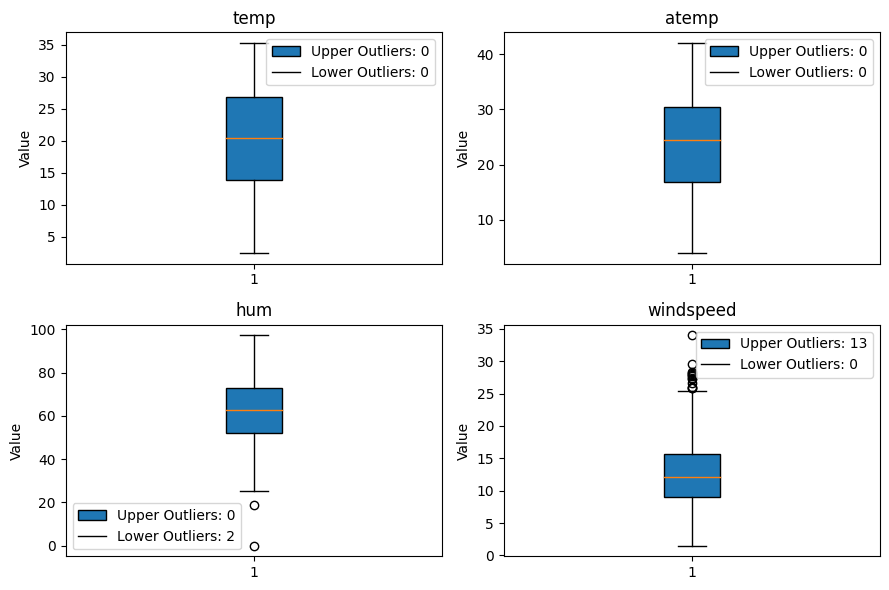

In [12]:
########################################
### Detect Ouliers using IQR (Boxplot)
########################################

import matplotlib.pyplot as plt

def plot_boxplot_with_outliers(df, columns):
    """
    Generates box plots for specified columns in a DataFrame, 
    displaying the number of upper and lower outliers (as determined by the IQR method) in the legend.

    Args:
        df: The Pandas DataFrame containing the data.
        columns: A list of column names for which to create box plots.
    """

    num_plots = len(columns)  #Determine how many plots are needed
    num_rows = (num_plots + 1) // 2 #Calculate the number of rows needed for subplots
    num_cols = 2 #Number of columns for subplots

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9, 3 * num_rows)) #Create subplots
    axes = axes.flatten()  #Flatten the axes array for easier iteration

    for i, col in enumerate(columns):
        ax = axes[i]                                      #Get the current axes object
        ax.boxplot(df[col], vert=True, patch_artist=True)  #Create the boxplot; patch_artist fills boxes with color
        ax.set_title(col)                                 #Set the title of the boxplot
        ax.set_ylabel("Value")                             #Set the y-axis label


        # --- Outlier Detection using the Interquartile Range (IQR) Method ---
        q1 = df[col].quantile(0.25)                     #Calculate the first quartile
        q3 = df[col].quantile(0.75)                     #Calculate the third quartile
        iqr = q3 - q1                                   #Calculate the interquartile range
        upper_bound = q3 + 1.5 * iqr                    #Calculate the upper bound for outliers
        lower_bound = q1 - 1.5 * iqr                    #Calculate the lower bound for outliers
        upper_outliers = df[(df[col] > upper_bound)][col].count() #Count outliers above upper bound
        lower_outliers = df[(df[col] < lower_bound)][col].count() #Count outliers below lower bound


        # --- Add outlier counts to the legend ---
        ax.legend([f"Upper Outliers: {upper_outliers}", f"Lower Outliers: {lower_outliers}"])


    # --- Remove any extra, unused subplots ---
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()  # Adjust spacing between subplots to prevent overlap.
    plt.show()          # Display the plot.


columns_to_plot = ['temp', 'atemp', 'hum', 'windspeed']
plot_boxplot_with_outliers(bike_data, columns_to_plot)



In [13]:
###################################
### Remove Ouliers Detected
###################################

# 'columns 'hum' and 'windspeed' have some outliers. Let's remove them

def remove_outliers_iqr(df, columns):
    """Removes outliers from specified columns using the IQR method."""
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


print("Original DataFrame shape:", bike_data.shape)

columns_to_clean = ['temp', 'atemp', 'hum', 'windspeed']
bike_data = remove_outliers_iqr(bike_data.copy(), columns_to_clean) #Using copy to avoid modifying the original

print("DataFrame after outlier removal shape:", bike_data.shape)

Original DataFrame shape: (730, 12)
DataFrame after outlier removal shape: (716, 12)


<br>

############################################################
### 2.3 Add actual category names to categorical values
############################################################

Several columns in this dataset represent categorical data using numerical values. To improve data clarity and analysis, we'll convert these numerical representations to their corresponding categorical forms, as defined in the data dictionary.  This conversion will involve first casting the columns to the `category` dtype in pandas.

In [14]:
#####################################################
# Decode categorical column's values into categories
#####################################################

cols = ['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']


for i in cols:
    bike_data[i] = bike_data[i].astype('category')
    
################################################################################
# Convert 'season' as per data dictionary - 1:spring, 2:summer, 3:fall, 4:winter
################################################################################

bike_data[['season']] = bike_data[['season']].apply(lambda x: x.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}))


##################################################
# Convert 'mnth' column as per data dictionary 
##################################################

bike_data[['mnth']] = bike_data[['mnth']].apply(lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',
                                                       5:'May',6:'Jun',7:'Jul',8:'Aug',
                                                       9:'Sep',10:'Oct',11:'Nov',12:'Dec'}))

############################################################
# Convert 'weekday' as per data dictionary - day of the week
############################################################

# Since January 1, 2018, fell on a Monday, I decided to decode weekday numerical values as follows: 

bike_data[['weekday']] = bike_data[['weekday']].apply(lambda x: x.map({0: 'Tue', 1: 'Wed', 2: 'Thu', 3: 'Fri', 
                                                                   4: 'Sat', 5: 'Sun', 6: 'Mon'}))

##################################################
# Convert 'weather' column as per data dictionary
##################################################

# - 1: Good (Clear, Few clouds, Partly cloudy, Partly cloudy)
# - 2: Fair (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)
# - 3: Bad (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
# - 4: Very Bad (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

bike_data[['weathersit']] = bike_data[['weathersit']].apply(lambda x: x.map({1:'Good', 2:'Fair', 3:'Bad', 4:'Very Bad'}))

##################################################
# Convert 'yr' column as per data dictionary -
##################################################

bike_data[['yr']] = bike_data[['yr']].apply(lambda x: x.map({1:'2019', 0:'2018'}))


##################################################
# Convert 'holiday' & 'workingday' column as per data dictionary -
##################################################

bike_data[['holiday']] = bike_data[['holiday']].apply(lambda x: x.map({1:'Yes', 0:'No'}))
bike_data[['workingday']] = bike_data[['workingday']].apply(lambda x: x.map({1:'Yes', 0:'No'}))


# Verify the first 5 rows

bike_data.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Mon,No,Fair,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tue,No,Fair,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wed,Yes,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thu,Yes,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Fri,Yes,Good,9.305237,11.46350,43.6957,12.522300,1600


######################################################################
### 2.4 Univariate Data Analysis
######################################################################

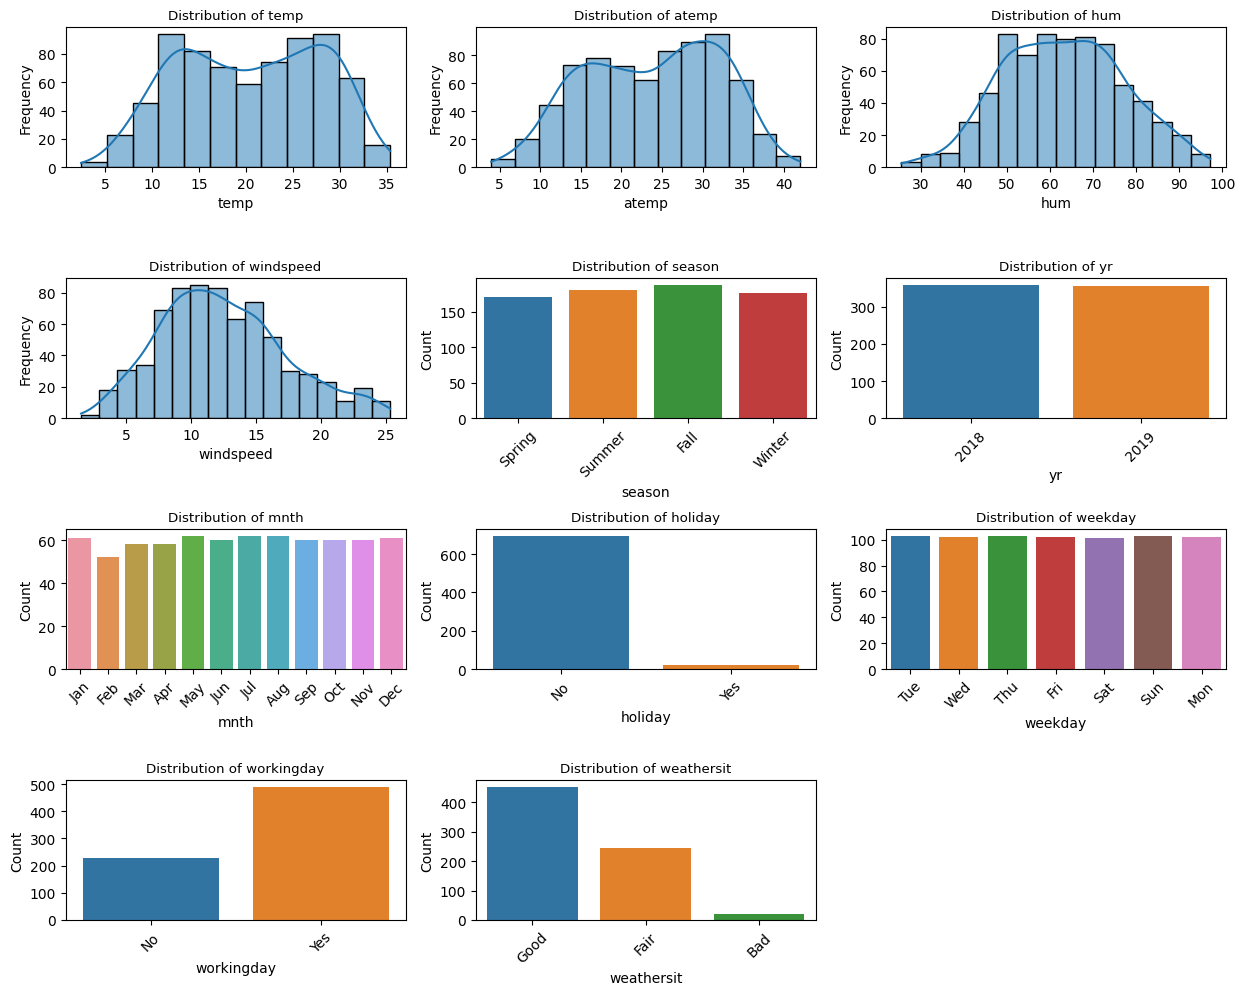

In [15]:
##########################################
## Distribution of the variables
#########################################


# Lists of column names for numerical and categorical features.

numerical_cols = ['temp', 'atemp', 'hum', 'windspeed']
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Calculate the number of plots and the optimal lawet for subplots with 3 columns.
# The '+ 2' in the num_rows calculation ensures enough rows are created to accommodate all plots, even if the total number isn't perfectly divisible by 3. 
# The ceiling division ('//') ensures a whole number of rows.

num_plots = len(numerical_cols) + len(categorical_cols)
num_rows = (num_plots + 2) // 3 
num_cols = 3

# Create the figure and axes for the subplots. figsize controls the overall size.
# The figsize is adjusted to maintain a reasonable aspect ratio with 3 columns.

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12.5, 2.5 * num_rows)) 
axes = axes.flatten() # Flatten the axes array for easier iteration.

# Set a smaller font size for better readability, especially with more subplots.

plt.rcParams.update({'font.size': 8})


# --- Create Histograms and KDE plots for Numerical Variables ---

for i, col in enumerate(numerical_cols):
    ax = axes[i]                                      # Get the current subplot axes.
    sns.histplot(bike_data[col], kde=True, ax=ax)     # Use seaborn to create histogram with KDE.
    ax.set_title(f'Distribution of {col}')            # Set subplot title.
    ax.set_xlabel(col)                                # Set x-axis label.
    ax.set_ylabel('Frequency')                         # Set y-axis label.


# --- Create Countplots for Categorical Variables ---

for i, col in enumerate(categorical_cols):
    ax = axes[i + len(numerical_cols)]                # Get the axes for the categorical plot.
    sns.countplot(x=col, data=bike_data, ax=ax)       # Use seaborn to create countplot.
    ax.set_title(f'Distribution of {col}')            # Set subplot title.
    ax.set_xlabel(col)                                # Set x-axis label.
    ax.set_ylabel('Count')                            # Set y-axis label.
    ax.tick_params(axis='x', rotation=45)             # Rotate x-axis labels if needed for readability.


# --- Remove any unused subplots ---

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])  # Remove any extra subplot axes.


plt.tight_layout()  # Adjust subplot spacing for a better lawet.
plt.show()          # Display the plot.

##########################################################################################
## Insights from 2.4 Univariate Data Analysis: Distribution of the variables
##########################################################################################

The provided visualization displays the distribution of several features related to bike rentals. Here are some key observations:

* **`temp`, `atemp`, `hum`, `windspeed`:** These numerical features exhibit roughly normal or slightly skewed distributions.  `temp` and `atemp` (temperature and "feels-like" temperature) have similar distributions, as expected.  `hum` (humidity) appears to have a relatively wide range.  `windspeed` shows a concentration at lower speeds with a tail towards higher values.

* **`season`:** The seasons are relatively evenly distributed, with summer and fall having a slight edge.

* **`yr`:** The data is almost equally split between 2018 and 2019.

* **`mnth`:**  The monthly distribution shows some variation, with lower counts in the winter months (January, February, November, December) and higher counts in the warmer months.

* **`holiday`:**  The vast majority of days are not holidays, with a very small number of holidays represented.

* **`weekday`:**  The distribution across weekdays is quite uniform, suggesting that day of the week might not be a strong predictor of bike rentals.

* **`workingday`:** More days are classified as working days than non-working days.

* **`weathersit`:**  The "Good" weather category dominates, followed by "Fair," with very few instances of "Bad" weather.


These observations provide an initial understanding of the data's characteristics. Further analysis, including correlation analysis and model building, is needed to understand the relationships between these features and the target variable (presumably bike rental count).


<Figure size 1200x800 with 0 Axes>

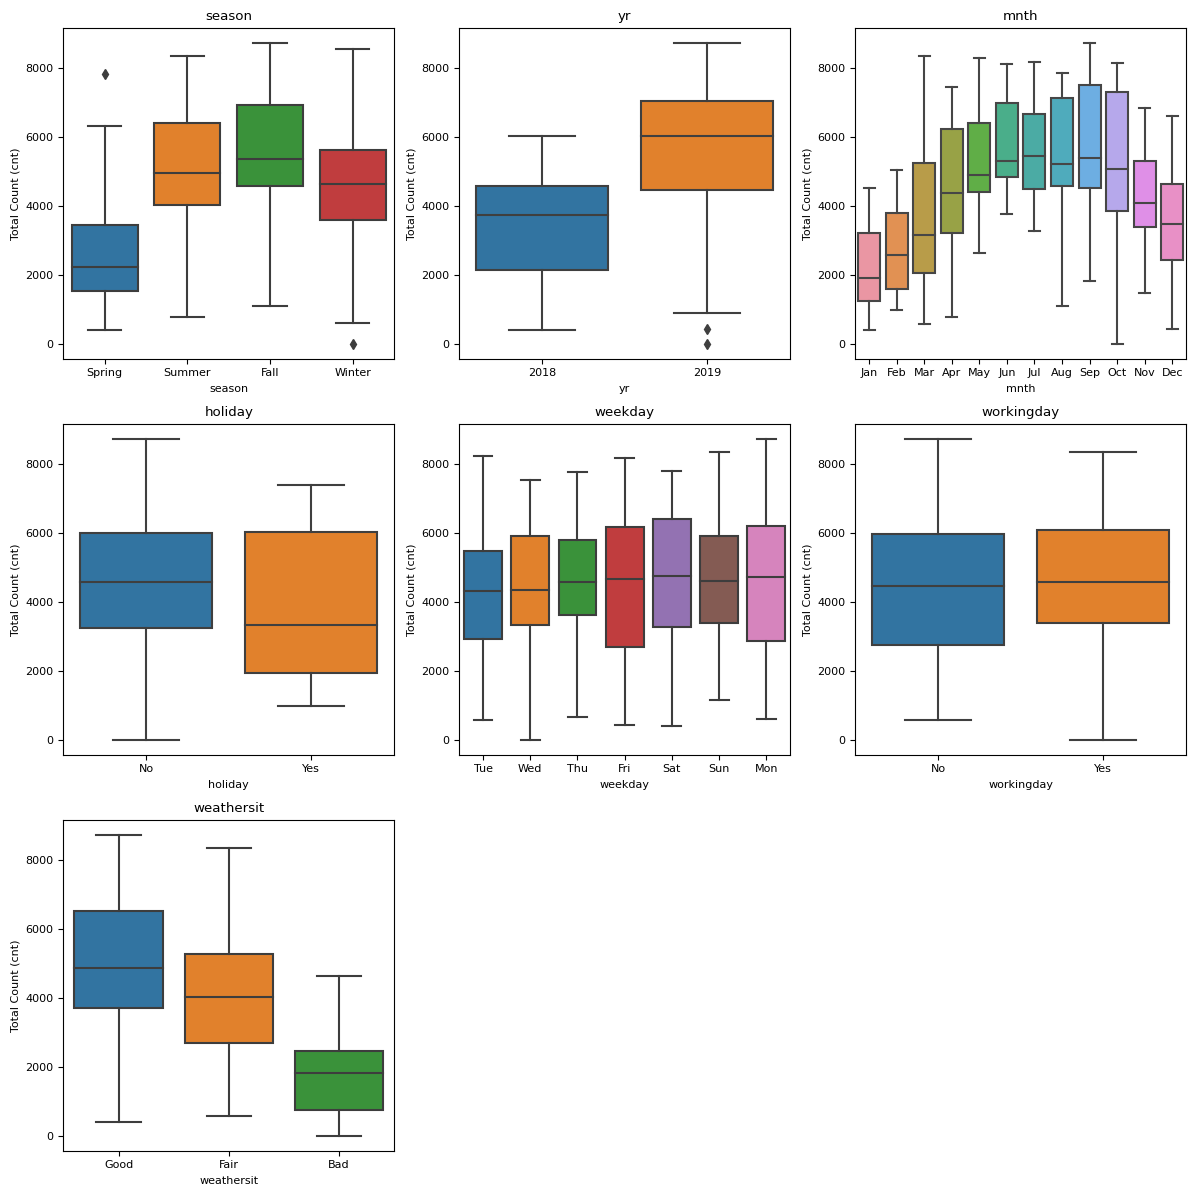

In [16]:
##########################################
### Box Plots of 'cnt' against Categorical Variables 
##########################################


# List of categorical features to be used in the box plots.
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Set the font size for better readability in the plots.
plt.rcParams.update({'font.size': 8})

# Adjust figure size for better visualization.
plt.figure(figsize=(12, 8))

# Calculate the number of plots and determine a suitable lawet for subplots.
num_plots = len(categorical_cols)
num_rows = (num_plots + 2) // 3 # Use ceiling division to get enough rows for 3 cols.
num_cols = 3

# Create subplots dynamically to accommodate all the plots.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten() # Flatten the axes array for easier iteration.

# Iterate through the categorical columns and create a box plot for each.
for i, col in enumerate(categorical_cols):
    ax = axes[i]                                          # Get the current subplot axes.
    sns.boxplot(x=col, y='cnt', data=bike_data, ax=ax)   # Create the box plot using seaborn.
    ax.set_title(col)                                     # Set the title of the box plot.
    ax.set_ylabel('Total Count (cnt)')                    # Set the y-axis label.
    ax.tick_params(axis='x', rotation=0)                 # Keep x-axis labels horizontal.

# Remove any extra, unused subplots.
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j]) #Remove extra axes object

plt.tight_layout()  # Adjust subplot spacing for better lawet.
plt.show()          # Display the plot.


################################################################################################
## Insights from 2.4 Univariate Data Analysis: Box Plots of 'cnt' against Categorical Variables 
################################################################################################


Above plots shows Box plots visualizing the relationship between several categorical features and the total count (`cnt`), presumably of bike rentals.  Here's a breakdown of the insights:

* **`season`:** Bike rentals are highest in Fall and Summer, with lower counts in Spring and significantly lower counts in Winter.  There is one outlier of a very high count in Spring.

* **`yr`:**  Bike rentals are considerably higher in 2019 than in 2018. A few low outliers exist for 2019.

* **`mnth`:** This plot clearly shows seasonality.  Rentals increase from January to a peak in June-September, then decrease again through the end of the year. This aligns with the `season` plot.

* **`holiday`:** The median rental count is slightly higher on non-holidays.  However, the interquartile range (IQR) is wider for non-holidays, indicating more variability in rental counts on regular days.

* **`weekday`:**  There's not a strong, visually apparent relationship between the day of the week and rental counts. The distributions look relatively similar across weekdays.

* **`workingday`:**  The median rental count is higher on working days compared to non-working days. This might seem counterintuitive but could be due to factors such as commuting or other workday-related bike usage.

* **`weathersit`:**  Rental counts are highest in "Good" weather, followed by "Fair" weather, and drastically lower in "Bad" weather.  This is as expected.


**Key Takeaways:**

* **Seasonality is a Major Factor:** The `season` and `mnth` plots highlight the strong seasonal influence on bike rentals.
* **Year-over-Year Growth:** Rentals appear to have increased from 2018 to 2019.
* **Weather is Important:**  `weathersit` has a substantial impact, with bad weather significantly reducing rentals.
* **Weekday Effect is Weak:**  There's no clear pattern based on the day of the week.
* **Working Day vs. Non-Working Day:**  Higher median rentals on working days suggest potential commuting or work-related usage.

These box plots provide valuable insights into the data and help identify important factors influencing bike rental counts.  Further analysis can quantify these relationships and build predictive models.




######################################################################
## 2.5 Bivariate Data Analysis
######################################################################

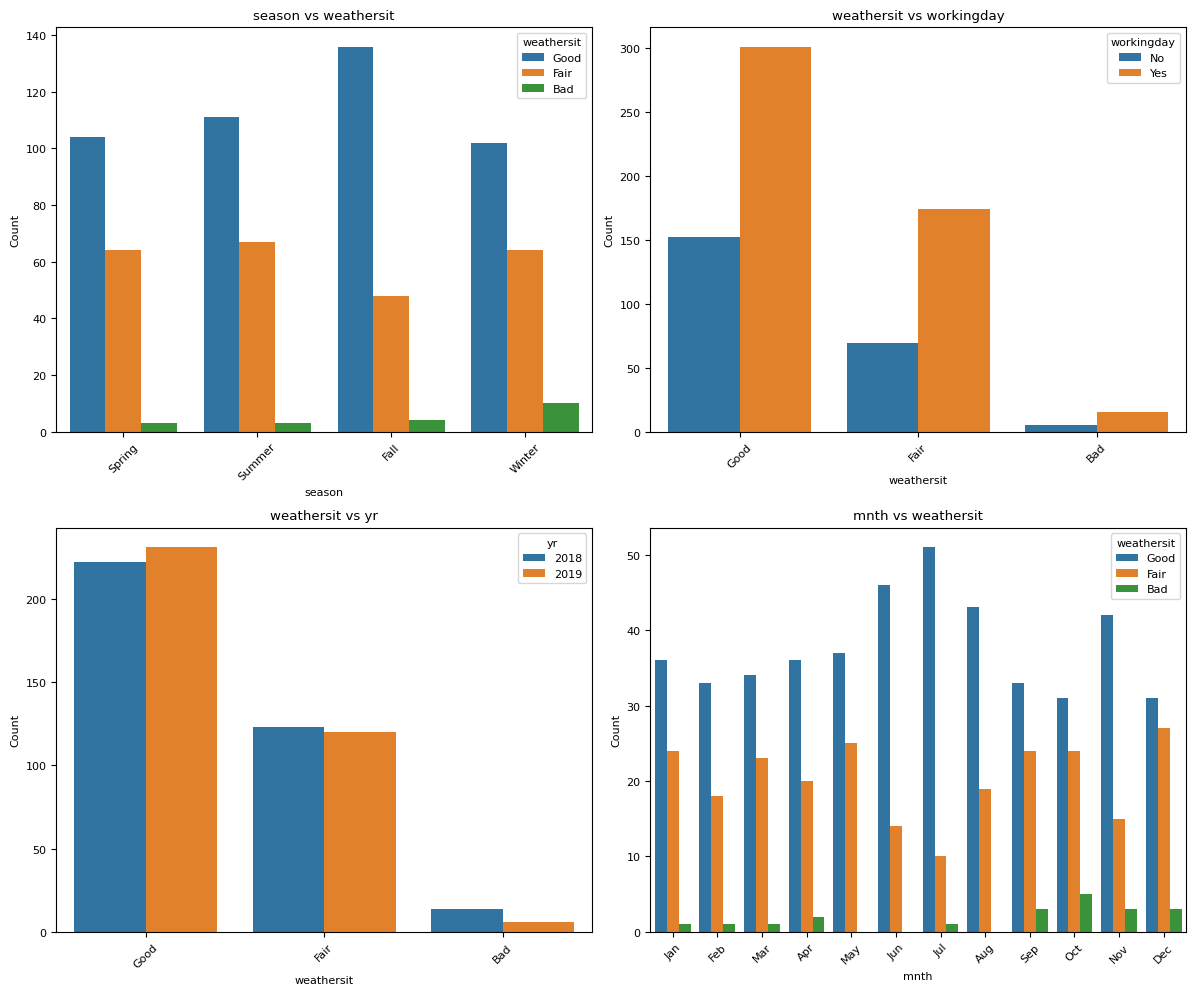

In [17]:
##############################################################
# --- Bivariate Analysis: Categorical vs. Categorical ---
##############################################################

# Define pairs of categorical columns for analysis.  Choose pairs relevant to our analysis.
categorical_pairs = [
    ('season', 'weathersit'),
    ('weathersit', 'workingday'),             
    ('weathersit', 'yr'),          
    ('mnth', 'weathersit'),         
]

# Function to create a clustered bar chart for categorical-categorical bivariate analysis.
def plot_categorical_bivariate(df, col1, col2):
    """
    Generates a clustered bar chart visualizing the relationship between two categorical variables.

    Args:
        df: The Pandas DataFrame containing the data.
        col1: The name of the first categorical column.
        col2: The name of the second categorical column.
    """
    plt.figure(figsize=(10, 5))  # Adjust figure size as needed.
    plt.rcParams.update({'font.size': 9})  # Set font size.
    sns.countplot(x=col1, hue=col2, data=df)  #Use seaborn for better aesthetics
    plt.title(f'Bivariate Analysis: {col1} vs. {col2}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability.
    plt.xlabel(col1)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Calculate the number of plots and determine a suitable lawet for subplots.
num_plots = len(categorical_pairs)
num_rows = (num_plots + 1) // 2  #Integer division to get a whole number of rows.
num_cols = 2                    #Two columns of subplots.

# Create subplots dynamically to accommodate all the plots.
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
axes = axes.flatten() # Flatten the axes array for easier iteration.

# Iterate through the categorical column pairs and create a clustered bar chart for each pair.
for i, (col1, col2) in enumerate(categorical_pairs):
    ax = axes[i]
    sns.countplot(x=col1, hue=col2, data=bike_data, ax=ax)
    ax.set_title(f'{col1} vs {col2}')
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel(col1)
    ax.set_ylabel('Count')

#Remove any extra unused subplots
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



##########################################################################
## Insights from 2.5 Bivariate Analysis (Categorical vs Categorical)
#########################################################################


The screenshot presents a bivariate analysis exploring relationships between different categorical variables and implicitly, the bike rental counts. Here's a breakdown:

* **`season` vs. `weathersit`:** Summer has the most "Good" weather days, followed by Spring.  Fall and winter have similar numbers of "Good" days. "Fair" weather days are highest in Summer, and "Bad" weather days are most frequent in Winter and least frequent in Summer.  Summer is the most favorable season for bike rentals based on weather.

* **`weathersit` vs. `workingday`:**  A large majority of "Good" and "Fair" weather days are also working days.  "Bad" weather days are more evenly distributed between working and non-working days, although still slightly favoring working days.

* **`weathersit` vs. `yr`:** In both 2018 and 2019, "Good" weather is the most common, followed by "Fair," and then "Bad."  The distribution is similar across both years, with slightly more "Good" and "Fair" weather days in 2019.

* **`mnth` vs. `weathersit`:** This plot shows the monthly distribution of weather types.  "Good" weather days peak in the summer months (June-August). "Fair" weather days are also more common in the warmer months. "Bad" weather days show less of a distinct seasonal pattern but appear slightly more common during the winter months and less frequent during summer.


**Key Insights:**

* **Summer is Ideal:** Summer stands out as having the highest proportion of "Good" weather days and is generally favorable for bike rentals.
* **Weather Predictability:** The distribution of weather types is somewhat predictable across seasons and months, with "Good" weather being most common overall.
* **Working Day Influence:** The strong association between good weather and working days might influence bike usage patterns, potentially for commuting.
* **Year-to-Year Consistency:** The weather patterns are relatively consistent between 2018 and 2019, with a slight improvement in weather conditions in 2019.


These bivariate analyses provide a deeper understanding of the relationships between different categorical variables and how they might influence the target variable (bike rental counts).  This information is valuable for feature selection and building more accurate predictive models.


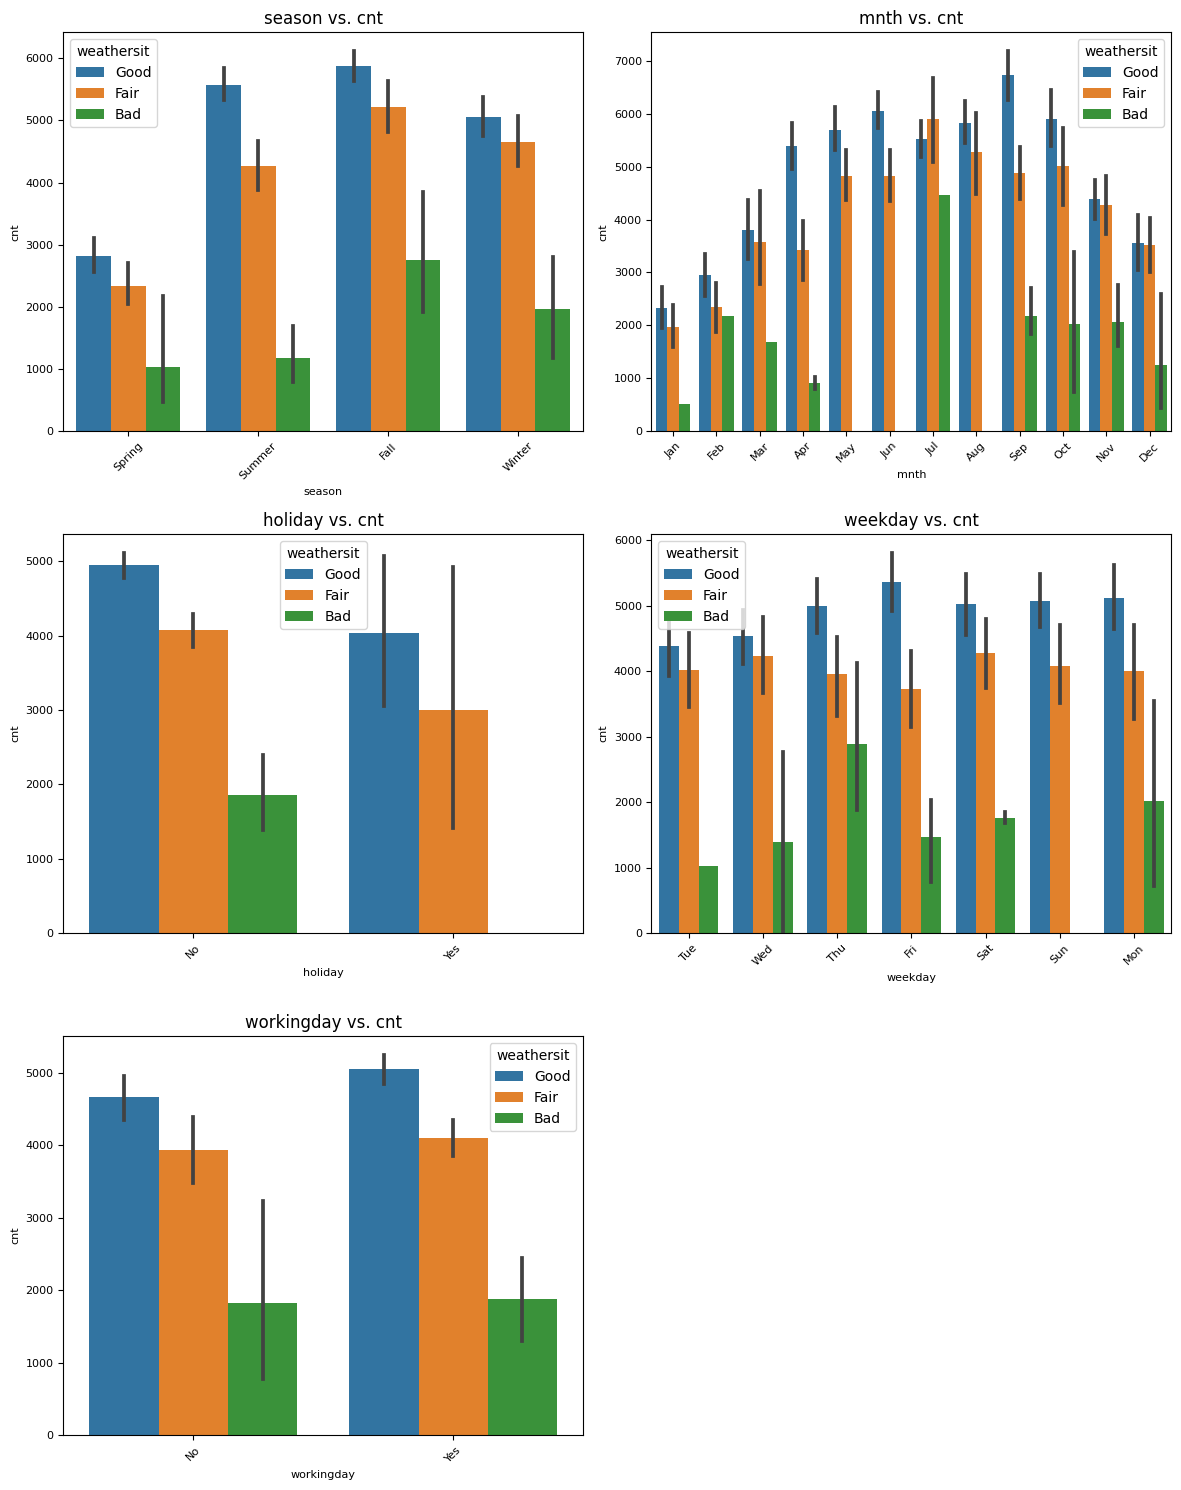

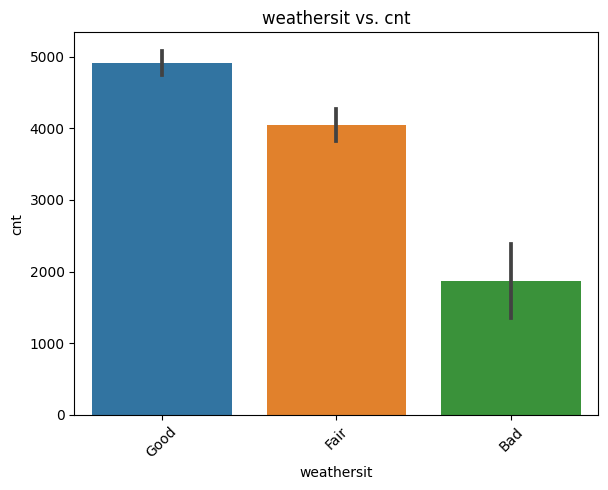

In [18]:
##############################################################
# --- Bivariate Analysis: Categorical vs. Continous ---
##############################################################


def plot_categorical_continuous(df, cat_cols, cont_col='cnt', hue_col=None):
    """
    Generates bar plots to visualize the relationship between categorical and continuous variables.

    Args:
        df: The Pandas DataFrame containing the data.
        cat_cols: A list of categorical column names.
        cont_col: The name of the continuous column (default is 'cnt').
        hue_col: An optional categorical column name for creating grouped bar plots.
    """
    num_plots = len(cat_cols)
    num_rows = (num_plots + 1) // 2
    num_cols = 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
    axes = axes.flatten()
    plt.rcParams.update({'font.size': 10})

    for i, cat_col in enumerate(cat_cols):
        ax = axes[i]
        if hue_col:
            sns.barplot(x=cat_col, y=cont_col, hue=hue_col, data=df, ax=ax)
        else:
            sns.barplot(x=cat_col, y=cont_col, data=df, ax=ax)
        ax.set_title(f'{cat_col} vs. {cont_col}')
        ax.set_xlabel(cat_col)
        ax.set_ylabel(cont_col)
        ax.tick_params(axis='x', rotation=45)
        plt.tight_layout()


    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

# List of categorical columns to analyze.
categorical_cols = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Generate plots.
plot_categorical_continuous(bike_data, categorical_cols[:5], hue_col='weathersit') #First 5 cols with hue
plot_categorical_continuous(bike_data, categorical_cols[5:]) #Last 2 cols without hue



##########################################################################
## Insights from 2.5 Bivariate Analysis (Categorical vs Categorical)
#########################################################################


The above plots display bivariate analysis examining the relationships between categorical features and the continuous target variable `cnt` (likely bike rental count). Here's a breakdown:

* **`season` vs. `cnt`:** Bike rentals are highest during Summer and Fall, significantly lower in Spring, and lowest in Winter.  Within each season, "Good" weather has the highest rental counts, followed by "Fair," and then "Bad."

* **`mnth` vs. `cnt`:** This plot reveals a strong seasonal trend. Rentals increase from January, peaking around June-September, and then declining through December.  Similar to the `season` plot, "Good" weather consistently leads to higher rentals within each month.

* **`holiday` vs. `cnt`:** On holidays, rental counts are slightly lower.  "Good" weather days have the highest counts regardless of holiday status.

* **`weekday` vs. `cnt`:** There isn't a strong, visually apparent pattern in rental counts based on the day of the week.  Variations within each day are mostly due to weather conditions, with "Good" weather having the highest counts.

* **`workingday` vs. `cnt`:** Rentals appear slightly higher on working days.  Again, within each category (working day or non-working day), "Good" weather leads to higher rentals.

**Key Observations:**

* **Seasonality and Weather Dominate:**  `season` and `mnth` demonstrate a strong seasonal influence on bike rentals, with weather conditions ("Good," "Fair," "Bad") playing a significant role within each season/month.
* **Holiday Effect is Minor:** Holidays have a slight negative impact on rental counts, but the effect of weather remains dominant.
* **Weekday Doesn't Show Strong Pattern:**  Day of the week doesn't appear to be a major driver of rentals, with weather being the more important factor.
* **Working Day Nuance:** Slightly higher rentals on working days might indicate commuting or work-related usage, but the effect of weather is still more pronounced.


These plots provide valuable insights into how categorical features influence bike rentals. They confirm the strong seasonal and weather-dependent nature of the data. This information is crucial for feature engineering and building effective predictive models.


#############################
### 2.6 Pair Plot Generation 
#############################

<Figure size 1200x1000 with 0 Axes>

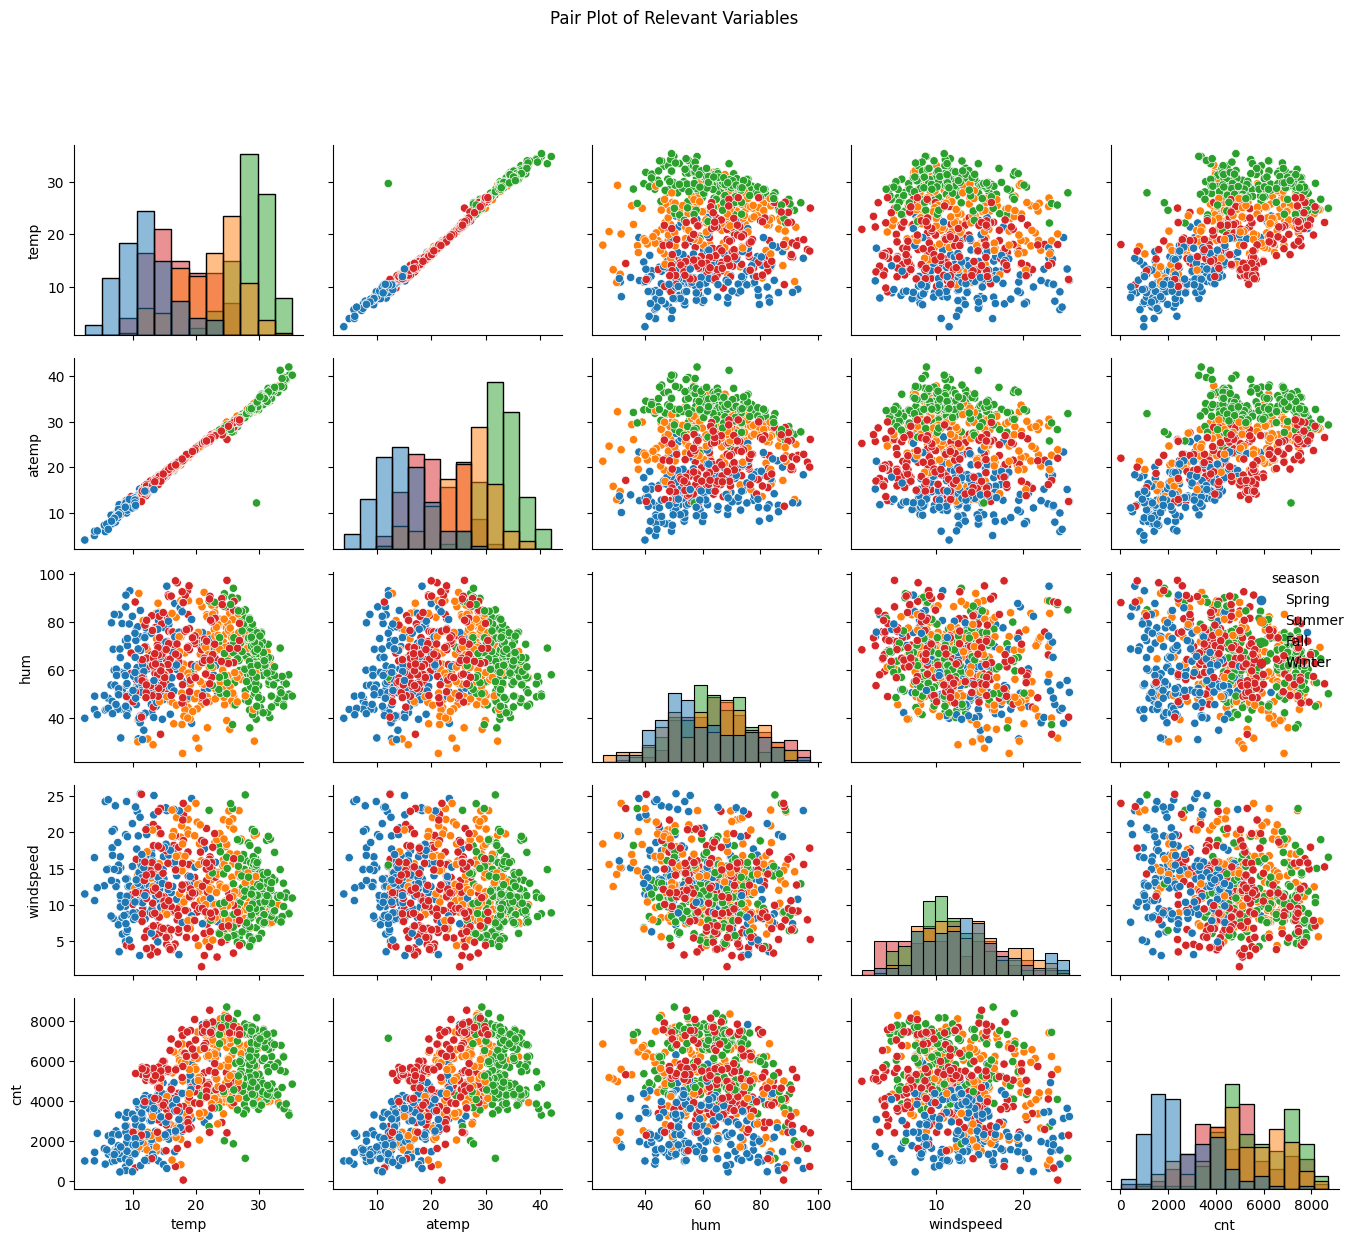

In [19]:
# Select columns for the pair plot. Exclude categorical columns with many levels
# (like 'weekday') to avoid overly complex plots.
columns_for_pairplot = ['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'yr', 'mnth', 'season', 'workingday', 'holiday', 'weathersit']

# Create the pair plot with histograms on the diagonal.
plt.figure(figsize=(12, 10))  # Adjust figure size as needed.
sns.pairplot(bike_data[columns_for_pairplot], diag_kind='hist', hue='season') # Changed diag_kind to 'hist'
plt.suptitle('Pair Plot of Relevant Variables', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##############################################################
### Insights from 2.6 Pair Plot Generation
##############################################################

The pair plot visualizes relationships between pairs of numerical variables and the categorical variable `season`, with `cnt` being the target variable (bike rental count).  Analysis is as follows:

* **`temp` vs. `atemp`:**  Shows a very strong positive linear relationship, as expected since `atemp` represents "feels-like" temperature.  This high correlation suggests potential multicollinearity, and one of these variables might be redundant for modeling.

* **`temp` / `atemp` vs. `cnt`:**  Both `temp` and `atemp` have a positive correlation with `cnt`.  Higher temperatures generally lead to higher rental counts. The relationship appears somewhat linear, although potentially with some curvature.

* **`temp` / `atemp` vs. `hum`:** There's no clear linear relationship between temperature and humidity.  Points are scattered, suggesting a weak or non-linear relationship.

* **`temp` / `atemp` vs. `windspeed`:**  There's no immediately obvious strong relationship between temperature and windspeed.  A slight negative trend *might* be present, but it's weak.

* **`hum` vs. `cnt`:**  There's no strong linear relationship between humidity and rental counts. The points are quite dispersed. Very high humidity might slightly suppress rentals, but the trend is not pronounced.

* **`hum` vs. `windspeed`:**  No discernible linear relationship is apparent.

* **`windspeed` vs. `cnt`:**  A slight negative relationship might exist, where higher wind speeds could slightly decrease rentals.  However, the trend is not very prominent.

* **`cnt` vs. `season` (implicitly shown by color):**  The coloring by `season` reveals that higher rental counts are predominantly associated with Spring, Summer, and Fall, with Winter having noticeably lower counts. This confirms the seasonal patterns observed in earlier visualizations.

**Key Takeaways:**

* **Temperature is Key:** `temp` (and `atemp`) show the strongest positive relationship with `cnt`, indicating that temperature is a major driver of bike rentals.
* **Multicollinearity:** The very strong correlation between `temp` and `atemp` should be addressed during model building (e.g., by removing one of them).
* **Humidity and Windspeed Less Important:**  `hum` and `windspeed` show weaker relationships with `cnt` compared to temperature.
* **Seasonality Confirmed:**  The coloring by `season` reinforces the strong seasonal influence on rental counts.

This pair plot helps visualize the relationships between numerical variables and how they correlate with the target variable `cnt`.  It highlights the importance of temperature and season, while also indicating potential multicollinearity issues to consider. This information is crucial for feature selection and model building.


#############################
## 2.7 Correlation Analysis 
#############################

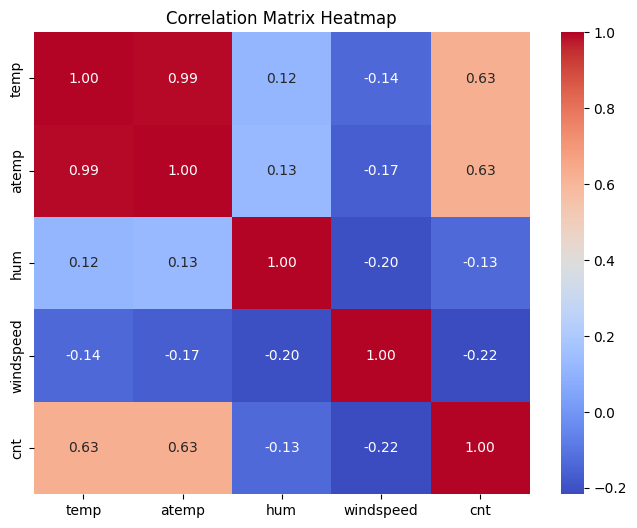

In [20]:
# --- Correlation Matrix and Heatmap ---

# Select numerical columns for correlation analysis.
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# Compute the correlation matrix.
correlation_matrix = bike_data[numerical_cols].corr()

# Generate a heatmap of the correlation matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot=True to display values, cmap for color scheme
plt.title('Correlation Matrix Heatmap')
plt.show()

#############################################
### Insights from 2.7 Correlation Analysis
#############################################

The heatmap visualizes the correlation matrix between numerical features, including the target variable `cnt` (bike rental count).  Here's a breakdown:

* **`temp` and `atemp`:**  Extremely high positive correlation (0.99). This confirms the strong linear relationship observed in the pair plot and indicates significant multicollinearity.  Using both in a model is redundant and could lead to instability.

* **`temp`/`atemp` and `cnt`:** Strong positive correlation (0.63 for both). This indicates that higher temperatures are associated with higher bike rental counts, a key finding.

* **`hum` and `cnt`:**  Weak negative correlation (-0.13).  Higher humidity is slightly associated with lower rental counts, but the relationship is not strong.

* **`windspeed` and `cnt`:**  Weak negative correlation (-0.22). Higher wind speeds are slightly associated with lower rentals, but again, the effect is not very pronounced.

* **`hum` and `temp`/`atemp`:** Very weak positive correlations (0.12 and 0.13).  The relationship between humidity and temperature is not strong.

* **`windspeed` and `temp`/`atemp`:** Weak negative correlations (-0.14 and -0.17).  Slightly higher wind speeds are associated with slightly lower temperatures, but the relationship isn't very strong.

* **`hum` and `windspeed`:** Weak negative correlation (-0.20).  Slightly higher wind speeds are associated with slightly lower humidity, but the relationship is not strong.



**Key Takeaways:**

* **Strong Temperature Effect:**  The strong positive correlation between `temp`/`atemp` and `cnt` confirms temperature as a primary driver of bike rentals.
* **Multicollinearity Issue:** The extremely high correlation between `temp` and `atemp` requires attention during model building. One should be removed.
* **Weaker Effects of Humidity and Windspeed:**  `hum` and `windspeed` have less influence on `cnt` compared to temperature.
* **No Other Strong Correlations:**  The remaining correlations are relatively weak, suggesting no other strong linear relationships among the features.


**Considering insights of correlation analysis, let's drop 'atemp' column**


In [21]:
#######################
## Drop 'atemp' column
#######################

bike_data.drop('atemp', axis=1, inplace=True)

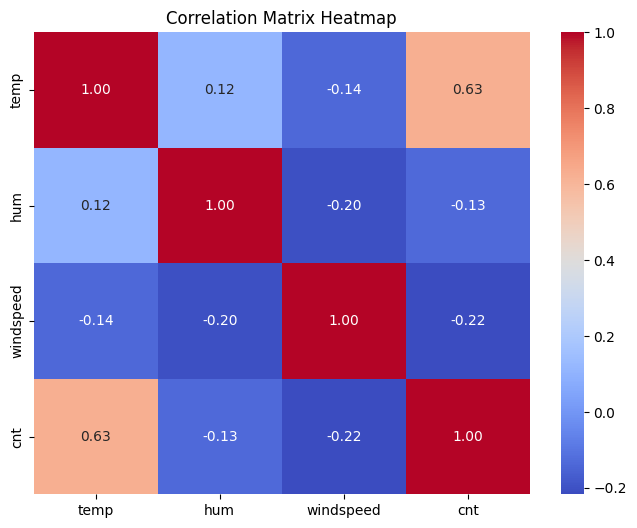

In [22]:
# --- Correlation Matrix and Heatmap ---

# Select numerical columns for correlation analysis.
numerical_cols = ['temp', 'hum', 'windspeed', 'cnt']

# Compute the correlation matrix.
correlation_matrix = bike_data[numerical_cols].corr()

# Generate a heatmap of the correlation matrix.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot=True to display values, cmap for color scheme
plt.title('Correlation Matrix Heatmap')
plt.show()

#######################################################################
### Insights from 2.7 Correlation Analysis (`atemp` variable removed)
#######################################################################

This heatmap visualizes the correlation matrix of the numerical features, including the target variable `cnt` (bike rental count).  Noticeably, the `atemp` variable is absent from this correlation matrix compared to the previous one.  Here's the breakdown:

* **`temp` and `cnt`:**  Strong positive correlation (0.63).  Higher temperatures are associated with higher bike rental counts.

* **`hum` and `cnt`:** Weak negative correlation (-0.13). Higher humidity is slightly associated with lower rental counts.

* **`windspeed` and `cnt`:** Weak negative correlation (-0.22). Higher wind speeds are slightly associated with lower rentals.

* **`temp` and `hum`:** Very weak positive correlation (0.12). The relationship between temperature and humidity is not strong.

* **`temp` and `windspeed`:** Weak negative correlation (-0.14). Slightly higher wind speeds are associated with slightly lower temperatures.

* **`hum` and `windspeed`:** Weak negative correlation (-0.20). Slightly higher wind speeds are associated with slightly lower humidity.

**Key Takeaways:**

* **Temperature Remains Key:** The strong positive correlation between `temp` and `cnt` reinforces temperature as a primary driver of bike rentals.
* **`atemp` Removed (Likely Due to Multicollinearity):** The absence of `atemp` suggests it was removed, likely due to its extremely high correlation with `temp` observed in the previous analysis.  This is a good practice to avoid multicollinearity issues in modeling.
* **Weaker Effects of Humidity and Windspeed:** `hum` and `windspeed` have less influence on `cnt` compared to temperature.
* **No Other Strong Correlations:**  The remaining correlations are relatively weak, suggesting no other strong linear relationships among the features.

<br>


Having removed the 'atemp' variable to address multicollinearity (due to its high correlation with 'temp'), no other independent variables exhibit excessively high correlation.  
The dataset is now prepared for the model building phase.

#############################
## 3. Feature Engineering (Creating Dummy Variables for Categorical Predictors)
#############################

In [23]:
### Dataframe info (before creation of dummy variables)

bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      716 non-null    category
 1   yr          716 non-null    category
 2   mnth        716 non-null    category
 3   holiday     716 non-null    category
 4   weekday     716 non-null    category
 5   workingday  716 non-null    category
 6   weathersit  716 non-null    category
 7   temp        716 non-null    float64 
 8   hum         716 non-null    float64 
 9   windspeed   716 non-null    float64 
 10  cnt         716 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 34.3 KB


In [24]:
## Taking a look at first 5 rows of the dataframe

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,2018,Jan,No,Mon,No,Fair,14.110847,80.5833,10.749882,985
1,Spring,2018,Jan,No,Tue,No,Fair,14.902598,69.6087,16.652113,801
2,Spring,2018,Jan,No,Wed,Yes,Good,8.050924,43.7273,16.636703,1349
3,Spring,2018,Jan,No,Thu,Yes,Good,8.200000,59.0435,10.739832,1562
4,Spring,2018,Jan,No,Fri,Yes,Good,9.305237,43.6957,12.522300,1600


In [25]:
######################################################################
## Creating and Merging Dummy Variables for Categorical Features 
######################################################################


def create_and_merge_dummies(df, cols_to_dummy):
    """
    Generates dummy variables for specified categorical columns and merges them into the DataFrame, 
    dropping the original columns.

    Args:
        df: The Pandas DataFrame.
        cols_to_dummy: A list of column names (strings) to create dummies for.

    Returns:
        The DataFrame with dummy variables added and original categorical columns removed.
    """
    # Create dummy variables.
    dummy_df = pd.get_dummies(df[cols_to_dummy], drop_first=True, dtype=int)

    # Merge dummy variables with original DataFrame.
    df = pd.concat([df, dummy_df], axis=1)

    # Drop original categorical columns.
    df = df.drop(cols_to_dummy, axis=1)

    return df

# --- Data Loading and Preparation ---

# --- Applying the function to create and merge dummy variables ---
categorical_cols = ['weekday', 'mnth', 'season', 'weathersit', 'yr', 'holiday', 'workingday']
bike_data = create_and_merge_dummies(bike_data, categorical_cols)
print(bike_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             716 non-null    float64
 1   hum              716 non-null    float64
 2   windspeed        716 non-null    float64
 3   cnt              716 non-null    int64  
 4   weekday_Wed      716 non-null    int64  
 5   weekday_Thu      716 non-null    int64  
 6   weekday_Fri      716 non-null    int64  
 7   weekday_Sat      716 non-null    int64  
 8   weekday_Sun      716 non-null    int64  
 9   weekday_Mon      716 non-null    int64  
 10  mnth_Feb         716 non-null    int64  
 11  mnth_Mar         716 non-null    int64  
 12  mnth_Apr         716 non-null    int64  
 13  mnth_May         716 non-null    int64  
 14  mnth_Jun         716 non-null    int64  
 15  mnth_Jul         716 non-null    int64  
 16  mnth_Aug         716 non-null    int64  
 17  mnth_Sep         716 

In [26]:
## Taking a look at first 5 rows of the dataframe to validate the changes done

bike_data.head()

,temp,hum,windspeed,cnt,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
0,14.110847,80.5833,10.749882,985,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8.200000,59.0435,10.739832,1562,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#############################
## 4. Train, Test Split
#############################

In [27]:

def split_data(df, train_size=0.7, random_state=42):
    """
    Splits a Pandas DataFrame into training and testing sets using scikit-learn's train_test_split.

    Args:
        df: The Pandas DataFrame to split.
        train_size: The proportion of the data to include in the training set (default is 0.7).
        random_state: Seed for the random number generator for reproducibility (default is 100).

    Returns:
        A tuple containing the training DataFrame and the testing DataFrame.  Returns None if 
        there's an issue with the input.
    """
    if not isinstance(df, pd.DataFrame):
        print("Error: Input must be a Pandas DataFrame.")
        return None
    try:
        df_train, df_test = train_test_split(df, train_size=train_size, random_state=random_state)
        return df_train, df_test
    except ValueError as e:
        print(f"Error during train_test_split: {e}")
        return None


df_train, df_test = split_data(bike_data)

if df_train is not None and df_test is not None:
    print("Shape of dataset after before train test split (after dummy varaibles creation)", bike_data.shape)
    print("Train set shape:", df_train.shape)
    print("\nTest set shape:", df_test.shape)
    

Shape of dataset after before train test split (after dummy varaibles creation) (716, 29)
Train set shape: (501, 29)

Test set shape: (215, 29)


In [28]:
## Taking a look at first 5 rows of the df_train to validate the changes done

df_train.head()

,temp,hum,windspeed,cnt,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
28,8.057402,65.1739,9.739455,1098,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43,12.977402,45.7391,17.479161,1589,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,9.122500,54.4167,13.625589,1472,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
76,22.140000,52.5217,15.478139,3239,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
172,30.066653,70.7500,11.541554,4507,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [29]:
## Taking a look at first 5 rows of the df_test to validate the changes done

df_test.head()

,temp,hum,windspeed,cnt,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
125,19.645847,59.0000,15.292482,4608,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
337,13.564153,77.5833,5.625206,3485,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
39,5.526103,49.4783,12.652213,1605,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
648,17.835000,46.3333,12.166932,7570,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
526,29.554153,58.7917,13.916771,6664,1,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1


########################
## 5. Feature Scaling
########################

For optimal performance of machine learning models, it's crucial that numerical features are on a comparable scale. We address this by using Min-Max scaling to normalize all numerical predictor variables (excluding dummy variables) in the training dataset. This preprocessing step helps prevent features with larger values from disproportionately influencing the model.

In [30]:

def scale_numerical_features(df, cols_to_scale):
    """
    Applies MinMax scaling to specified numerical columns in a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame containing the data.
        cols_to_scale: A list of column names (strings) to scale.

    Returns:
        The DataFrame with the specified columns scaled using MinMaxScaler.  Returns None if 
        there's an issue with the input.
    """
    if not isinstance(df, pd.DataFrame):
        print("Error: Input must be a Pandas DataFrame.")
        return None
    if not all(col in df.columns for col in cols_to_scale):
        print("Error: Not all columns to scale are present in the DataFrame.")
        return None
    try:
        scaler = MinMaxScaler()
        df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
        return df
    except ValueError as e:
        print(f"Error during scaling: {e}")
        return None


num_vars = ['temp', 'hum', 'windspeed', 'cnt']
#num_vars = ['temp', 'hum', 'windspeed']
df_train = scale_numerical_features(df_train, num_vars)

if df_train is not None:
    print("Shape after scaling:", df_train.shape)



Shape after scaling: (501, 29)


In [31]:
## Taking a look at first 5 rows of the df_test to validate the changes done

df_train.head()

,temp,hum,windspeed,cnt,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
28,0.171197,0.571704,0.345706,0.123792,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
43,0.320723,0.292234,0.670454,0.180281,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,0.203567,0.417017,0.508763,0.166820,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
76,0.599187,0.389767,0.586494,0.370110,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
172,0.840090,0.651888,0.421320,0.515992,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [32]:
# Validate whether the values of the contionous variables are between 0 - 1 

df_train.describe()

,temp,hum,windspeed,cnt,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,0.547751,0.532820,0.465414,0.521356,0.143713,0.131737,0.129741,0.151697,0.139721,0.155689,...,0.087824,0.083832,0.263473,0.257485,0.243513,0.323353,0.023952,0.512974,0.031936,0.664671
std,0.227884,0.196445,0.204725,0.222082,0.351149,0.338542,0.336354,0.359085,0.347043,0.362922,...,0.283322,0.277413,0.440957,0.437686,0.429631,0.468224,0.153053,0.500331,0.176006,0.472577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352054,0.380467,0.314704,0.373332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.529059,0.440565,0.532214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.744560,0.674057,0.587452,0.684998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


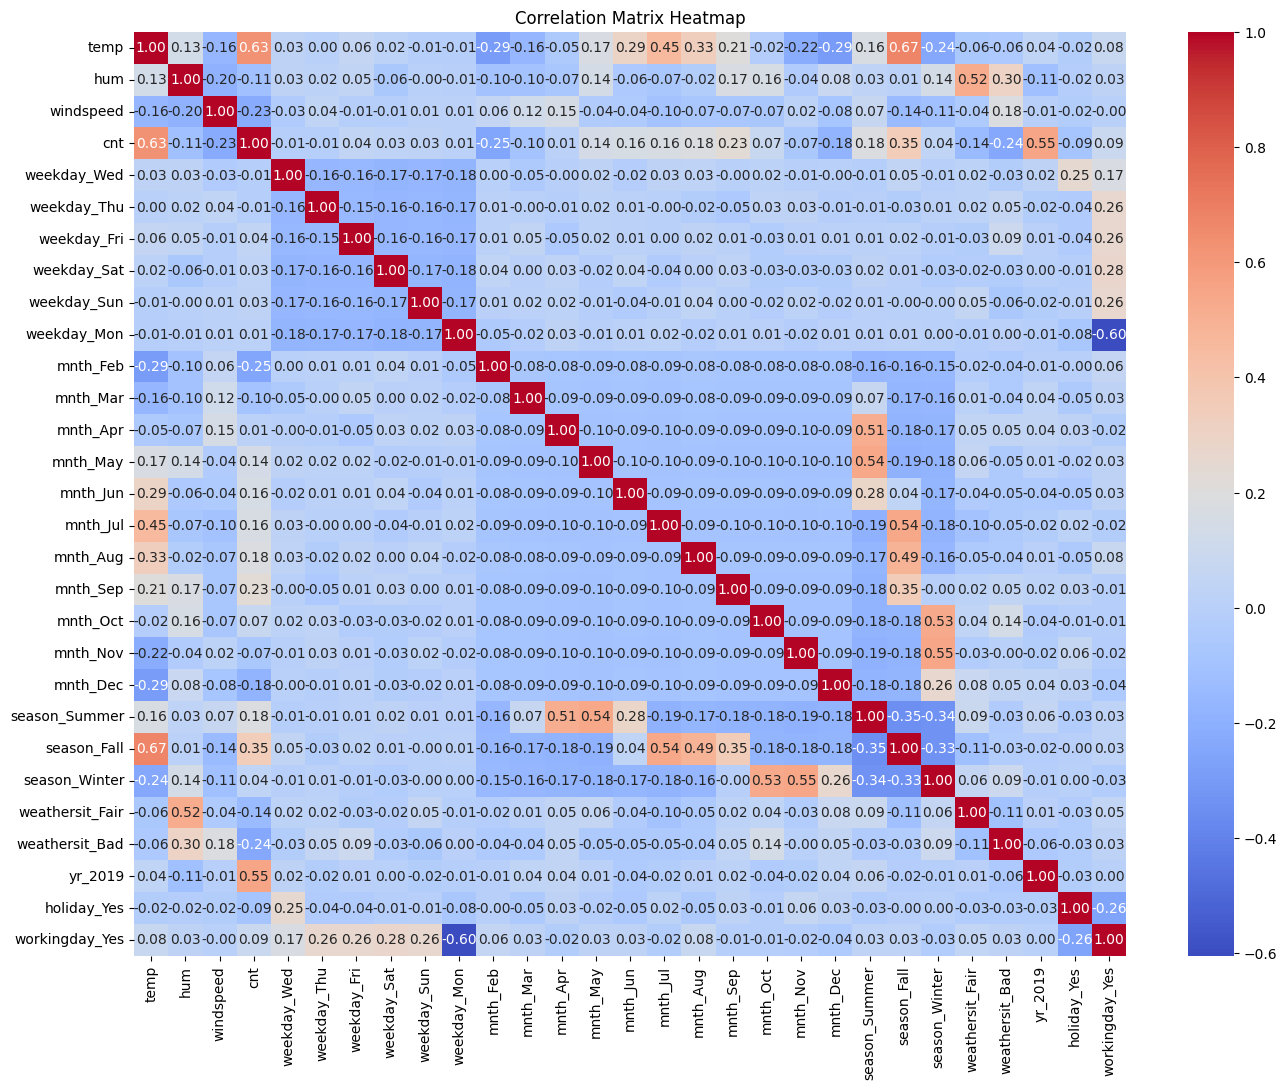

In [33]:
# --- Correlation Matrix and Heatmap ---


# Compute the correlation matrix.
correlation_matrix = df_train.corr()

# Generate a heatmap of the correlation matrix.
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot=True to display values, cmap for color scheme
plt.title('Correlation Matrix Heatmap')
plt.show()

### Insights from above Correlation Plot:


1. **Predictor-Target Relationships:** The correlation heatmap provides a visual representation of the relationships between each predictor variable and the target variable (`cnt`).  The strength and direction of these relationships (positive or negative) are readily apparent, indicating the potential influence of each predictor on bike rentals.

2. **Identifying Strong Predictors:**  The heatmap helps identify those predictors most strongly associated with `cnt`.  These variables are prime candidates for inclusion in the initial model.

3. **Detecting Multicollinearity:** The heatmap reveals potential multicollinearity—high correlations between predictor variables themselves.  High multicollinearity can lead to unstable and unreliable model coefficients, making interpretation difficult.

4. **Feature Selection Guidance:** The correlation analysis informs feature selection strategies.  Predictors with very high correlations with other predictors might be excluded to avoid multicollinearity.  A balance must be struck between including relevant predictors and maintaining model stability.

5. **Model Building Implications:** Understanding the correlation structure is fundamental to building a robust and interpretable model.  The heatmap guides decisions about which variables to include and provides insights into potential interactions between variables that might warrant further investigation.


################################
## 6.Model Building
################################

#############
### Linear Regression Model Assumptions and Significance Level:
#############

<br>

Before model building, several assumptions underlying linear regression must be considered:

1. **Linearity:** A linear relationship is assumed between the independent variables (X) and the dependent variable (y).  Deviations from linearity may necessitate transformations of variables or the use of a non-linear model.

2. **Normality of Residuals:** The error terms (residuals) are assumed to be normally distributed with a mean of zero.  Normality of residuals ensures unbiased and efficient estimation of model parameters.  Tests of normality (e.g., Shapiro-Wilk test, Q-Q plot) and visual inspection of residual plots can assess this assumption.

3. **Homoscedasticity:**  The error terms are assumed to have constant variance (homoscedasticity).  Heteroscedasticity (non-constant variance) can lead to inefficient and biased estimates.  Residual plots can visually assess homoscedasticity; statistical tests (e.g., Breusch-Pagan test) can also be employed.

4. **Independence of Errors:** The error terms are assumed to be independent of each other.  Autocorrelation (correlation between error terms) violates this assumption and can be detected using tests like the Durbin-Watson test.

5. **No Perfect Multicollinearity:**  Perfect multicollinearity (where one predictor is a perfect linear combination of others) should be avoided, as it renders model estimation impossible.  High multicollinearity (correlation among predictors) can inflate standard errors of coefficients, making it difficult to interpret results.  Variance Inflation Factor (VIF) and correlation analysis are used to assess multicollinearity.

6. **Significance Level:**  A significance level of 1% (p-value < 0.01) is adopted for hypothesis testing. This implies that a p-value below 0.01 will be considered statistically significant, indicating evidence against the null hypothesis.

7. **Variance Inflation Factor (VIF) Threshold:**  A VIF threshold of 5 is established. Variables exceeding this VIF value are considered to have high multicollinearity and may be removed from the model.

<br>

These assumptions and thresholds guide model building and evaluation, ensuring the reliability and validity of the regression results.  Diagnostic tests are used to assess the validity of these assumptions after the model is fit.

###################################################
### 6.1 Split `df_train` into `X_train` and `y_train` 
###################################################

In [34]:
y_train = df_train.pop('cnt')  ## Create dataframe having target variables
X_train = df_train             ## Create dataframe having indepdent variables

In [35]:
X_train.shape  ## Check shape of X_train

(501, 28)

In [36]:
y_train.shape ## Check shape of y_train

(501,)

#############################################################################
### 6.2 Dimensionality Reduction: Recursive Feature Elimination (RFE)
#############################################################################

An iterative approach to model building is adopted, beginning with Recursive Feature Elimination (RFE) for automated feature selection. The features selected by RFE will then be manually refined through an iterative process of model evaluation and adjustment. This involves assessing model diagnostics (e.g., residual plots, VIF) and performance metrics (e.g., R-squared, adjusted R-squared) to optimize the final set of predictors.

In [37]:
def perform_rfe_selection(X_train, y_train, num_features_to_select):
    """
    Performs Recursive Feature Elimination (RFE) for feature selection.

    Args:
        X_train: The training data predictor variables (Pandas DataFrame or NumPy array).
        y_train: The training data target variable (Pandas Series or NumPy array).
        num_features_to_select: The desired number of features to select.

    Returns:
        A tuple containing:
            - selected_cols: A list of the names of the selected columns.
            - rejected_cols:  A list of the names of the rejected columns.
            - rfe: The fitted RFE object.
        Returns None if there's an issue.

    """
    if not isinstance(X_train, (pd.DataFrame, np.ndarray)):
        print("Error: X_train must be a Pandas DataFrame or NumPy array.")
        return None
    if not isinstance(y_train, (pd.Series, np.ndarray)):
        print("Error: y_train must be a Pandas Series or NumPy array.")
        return None
    
    try:

        lm = LinearRegression()
        lm.fit(X_train, y_train)


        rfe = RFE(lm, n_features_to_select=num_features_to_select)  # Corrected parameter name
        rfe = rfe.fit(X_train, y_train)

        # Get selected and rejected column names
        if isinstance(X_train, pd.DataFrame):  # Handle DataFrame input
            selected_cols = X_train.columns[rfe.support_].tolist()
            rejected_cols = X_train.columns[~rfe.support_].tolist()
        else:  # Handle NumPy array input (assuming column names are not available)
            selected_cols = X_train[:, rfe.support_].tolist() # Returns the selected columns as a numpy array
            rejected_cols = X_train[:, ~rfe.support_].tolist() # Returns the rejected columns as a numpy array

        return selected_cols, rejected_cols, rfe

    except ValueError as e:
        print(f"Error during RFE: {e}")
        return None


# Example usage:
# Assuming X_train and y_train are defined
selected_columns, rejected_columns, rfe_object = perform_rfe_selection(X_train, y_train, 16)

if selected_columns is not None and rejected_columns is not None:
    print("Selected Columns:", selected_columns)
    print("\nRejected Columns:", rejected_columns)


Selected Columns: ['temp', 'hum', 'windspeed', 'weekday_Mon', 'mnth_May', 'mnth_Aug', 'mnth_Sep', 'mnth_Nov', 'mnth_Dec', 'season_Summer', 'season_Fall', 'season_Winter', 'weathersit_Fair', 'weathersit_Bad', 'yr_2019', 'workingday_Yes']

Rejected Columns: ['weekday_Wed', 'weekday_Thu', 'weekday_Fri', 'weekday_Sat', 'weekday_Sun', 'mnth_Feb', 'mnth_Mar', 'mnth_Apr', 'mnth_Jun', 'mnth_Jul', 'mnth_Oct', 'holiday_Yes']


In [38]:
##############################################
#### Create datarame `X_train_rfe` with selected cplumns 
##############################################

X_train_rfe = X_train[selected_columns]

In [39]:
### Check shape of X_train_rfe

X_train_rfe.shape

(501, 16)

#############################
## 6.3 Building Model 1
#############################

In [40]:
# Add a constant term to the predictor variables

X_train_lm1 = sm.add_constant(X_train_rfe)

# Fit an Ordinary Least Squares (OLS) regression model

lm1 = sm.OLS(y_train,X_train_lm1).fit() 

# Display the model summary statistics
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     163.2
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          3.05e-183
Time:                        16:24:45   Log-Likelihood:                 508.33
No. Observations:                 501   AIC:                            -982.7
Df Residuals:                     484   BIC:                            -911.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1574      0.024     

#####################
## VIF of Model 1
#####################

### VIF :
The Variance Inflation Factor (VIF) measures how much the variance of a regression coefficient is inflated due to multicollinearity (correlation) with other predictors.  A higher VIF indicates stronger multicollinearity.  A VIF of 1 means no multicollinearity.  Values above 5 or 10 are often considered problematic.  High VIFs can make it difficult to isolate the individual effects of predictors.

In [41]:
# Remove the constant term from the predictors
X_train_new = X_train_lm1.drop(['const'], axis=1)


# Compute Variance Inflation Factors (VIFs)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)  # Round VIF values to two decimal places
vif = vif.sort_values(by="VIF", ascending=False)  # Sort by VIF in descending order
vif # Display the results (added this for consistency)



,Features,VIF
0,temp,24.47
1,hum,12.36
10,season_Fall,8.36
2,windspeed,4.78
15,workingday_Yes,4.28
9,season_Summer,4.25
11,season_Winter,3.99
12,weathersit_Fair,2.36
14,yr_2019,2.04
7,mnth_Nov,1.91


####################################################
### Approach for next models: Drop one variable at a time (in each iteration)
###################################################

Justification for the "drop one variable at a time" approach in an iterative model building process:

* **Controlled Variable Removal:** Dropping one variable at a time allows for a controlled experiment.  we can isolate the specific impact of removing each predictor on the model's performance and multicollinearity. This controlled approach helps we understand the role each variable plays and avoid unintended consequences.

* **Interpretability and Insight:**  Removing one variable at a time makes it easier to interpret the changes in the model's coefficients, p-values, and overall fit.  This provides valuable insights into the relationships between predictors and the target variable.

* **Avoiding Masking Effects:**  Multicollinearity can mask the true significance of individual predictors. Dropping multiple correlated variables simultaneously can obscure which variable was truly driving the multicollinearity and which might have been genuinely important but masked by the presence of others. The one-at-a-time approach helps uncover these masking effects.

* **Preventing Overfitting and Bias:** Dropping too many variables at once, especially without careful consideration, can lead to overfitting (fitting the noise in the training data) or introducing bias.  The iterative approach, combined with cross-validation or hold-out testing, helps prevent these issues and ensures the model generalizes well to new data.

* **Facilitating Model Comparison:**  The step-by-step approach facilitates model comparison.  we can systematically compare the performance of the model at each iteration (e.g., using AIC, BIC, or adjusted R-squared) to identify the optimal combination of predictors.

* **Alignment with Best Practices:**  The iterative process of model building, including dropping one variable at a time, is a widely accepted best practice in statistical modeling.  It promotes transparency, rigor, and sound statistical reasoning.



#############################
## 6.4 Building Model 2
#############################

In [42]:
##########################################################
## Let's drop 'mnth_Aug' as it has high p-value (0.090)
##########################################################

X_train_lm2 = X_train_lm1.drop(['mnth_Aug'], axis=1)

# Add a constant term to the updated predictors
X_train_lm2 = sm.add_constant(X_train_lm2)

# Fit the second OLS regression model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

# Display the model summary
print(lm2.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     173.3
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          9.52e-184
Time:                        16:24:45   Log-Likelihood:                 506.84
No. Observations:                 501   AIC:                            -981.7
Df Residuals:                     485   BIC:                            -914.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1563      0.024     

#####################
## VIF of Model 2
#####################

In [43]:
# Remove the constant term from the predictors
X_train_new = X_train_lm2.drop(['const'], axis=1)

# Compute Variance Inflation Factors (VIFs)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)  # Round VIF values to two decimal places
vif = vif.sort_values(by="VIF", ascending=False)  # Sort by VIF in descending order
vif # Display the results (added this for consistency)



,Features,VIF
0,temp,24.41
1,hum,12.36
9,season_Fall,7.48
2,windspeed,4.78
14,workingday_Yes,4.27
8,season_Summer,4.24
10,season_Winter,3.98
11,weathersit_Fair,2.36
13,yr_2019,2.03
6,mnth_Nov,1.91


#############################
## 6.5 Building Model 3
#############################

In [44]:
######################################################
## Let's drop 'mnth_May' as it has high p-value (0.120)
######################################################

X_train_lm3 = X_train_lm2.drop('mnth_May', axis=1)

# Add a constant term to the updated predictors
X_train_lm3 = sm.add_constant(X_train_lm3)

# Fit the second OLS regression model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

# Display the model summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     184.9
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          2.29e-184
Time:                        16:24:46   Log-Likelihood:                 505.59
No. Observations:                 501   AIC:                            -981.2
Df Residuals:                     486   BIC:                            -917.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1514      0.024     

#####################
## VIF of Model 3
#####################

In [45]:
# Remove the constant term from the predictors
X_train_new = X_train_lm3.drop(['const'], axis=1)

# Compute Variance Inflation Factors (VIFs)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)  # Round VIF values to two decimal places
vif = vif.sort_values(by="VIF", ascending=False)  # Sort by VIF in descending order
vif # Display the results (added this for consistency)



,Features,VIF
0,temp,24.08
1,hum,12.22
8,season_Fall,7.35
2,windspeed,4.69
13,workingday_Yes,4.26
7,season_Summer,3.96
9,season_Winter,3.93
10,weathersit_Fair,2.35
12,yr_2019,2.03
5,mnth_Nov,1.90


#############################
## 6.6 Building Model 4
#############################

In [46]:
###########################################
## Let's drop 'hum' as it has high VIF (12.22)
###########################################

X_train_lm4 = X_train_lm3.drop('hum', axis=1)

# Add a constant term to the updated predictors
X_train_lm4 = sm.add_constant(X_train_lm4)

# Fit the second OLS regression model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

# Display the model summary
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     190.7
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          1.63e-181
Time:                        16:24:46   Log-Likelihood:                 496.05
No. Observations:                 501   AIC:                            -964.1
Df Residuals:                     487   BIC:                            -905.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0946      0.020     

#####################
## VIF of Model 4
#####################

In [47]:
# Remove the constant term from the predictors
X_train_new = X_train_lm4.drop(['const'], axis=1)

# Compute Variance Inflation Factors (VIFs)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)  # Round VIF values to two decimal places
vif = vif.sort_values(by="VIF", ascending=False)  # Sort by VIF in descending order
vif # Display the results (added this for consistency)



,Features,VIF
0,temp,18.20
7,season_Fall,7.01
1,windspeed,4.64
12,workingday_Yes,4.11
8,season_Winter,3.93
6,season_Summer,3.92
11,yr_2019,2.03
4,mnth_Nov,1.88
2,weekday_Mon,1.70
9,weathersit_Fair,1.53


#############################
## 6.7 Building Model 5
#############################

In [48]:
######################################################
## Let's drop 'season_Fall' as it has high VIF (7.01)
#####################################################


X_train_lm5 = X_train_lm4.drop('season_Fall', axis=1)

# Add a constant term to the updated predictors
X_train_lm5 = sm.add_constant(X_train_lm5)

# Fit the second OLS regression model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

# Display the model summary
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     193.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          6.63e-177
Time:                        16:24:46   Log-Likelihood:                 482.34
No. Observations:                 501   AIC:                            -938.7
Df Residuals:                     488   BIC:                            -883.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0727      0.020     

<br>

##########################################
### Model 5 Summary is explained follows:
##########################################

<br>

This output summarizes the results of an Ordinary Least Squares (OLS) regression analysis, likely for predicting bike counts (`cnt`). Let's break down the key parts:

**1. Overall Model Fit:**

* **R-squared (0.827):**  Indicates that approximately 82.7% of the variance in the dependent variable (`cnt`) is explained by the independent variables in the model.  This is a relatively high R-squared, suggesting a good fit.
* **Adjusted R-squared (0.822):** A modified version of R-squared that accounts for the number of predictors in the model.  It's slightly lower than R-squared, which is expected, and still indicates a good fit.
* **F-statistic (193.8) and Prob (F-statistic) (6.63e-177):** This tests the overall significance of the regression model. The very low p-value (close to zero) indicates that the model is statistically significant, meaning that at least one of the independent variables is significantly related to the dependent variable.

**2. Model Coefficients:**

The table shows the estimated coefficients for each independent variable, along with their standard errors, t-statistics, and p-values.

* **coef:** The estimated coefficient for each variable.  For example, a one-unit increase in `temp` is associated with an estimated increase of 0.5353 in `cnt`, holding other variables constant.
* **std err:** The standard error of the coefficient estimate.  Smaller standard errors indicate more precise estimates.
* **t:** The t-statistic, which tests the null hypothesis that the true coefficient is zero (i.e., no relationship between the variable and `cnt`).
* **P>|t|:** The p-value associated with the t-statistic. A p-value less than a chosen significance level (e.g., 0.05) indicates that the variable is statistically significant.

**Key Predictors:**

Based on the p-values, the following variables appear to be statistically significant predictors of `cnt`:

* `temp`
* `windspeed`
* `weekday_Mon`
* `mnth_Sep`
* `mnth_Nov`
* `mnth_Dec`
* `season_Summer`
* `season_Winter`
* `weathersit_Fair`
* `weathersit_Bad`
* `yr_2019`
* `workingday_Yes`

**3. Other Statistics:**

* **AIC (-938.7) and BIC (-883.9):** Information criteria used for model selection. Lower values are generally preferred.
* **Omnibus, Prob(Omnibus), Skew, Kurtosis, Jarque-Bera (JB), Prob(JB):**  These statistics test the normality of the residuals.  The significant `Prob(Omnibus)` and `Prob(JB)` suggest that the residuals might not be perfectly normally distributed.
* **Durbin-Watson (1.957):** Tests for autocorrelation in the residuals.  A value around 2 suggests no significant autocorrelation.
* **Cond. No. (11.9):** The condition number, which can indicate multicollinearity (high correlation between predictor variables).  A value below 30 is generally considered acceptable.

**4. Notes:**

The note about standard errors is a standard reminder that these calculations assume the model's assumptions (including homoscedasticity and no autocorrelation) are met.  If these assumptions are violated, the standard errors and p-values might not be reliable.


In summary, the model seems to have a good fit, explaining a substantial portion of the variance in bike counts.  Several predictor variables are statistically significant. However, the normality of the residuals should be further examined.


<br>

########################################################
### Plot: R-squared and Adjusted R-squared (Training Data)
########################################################

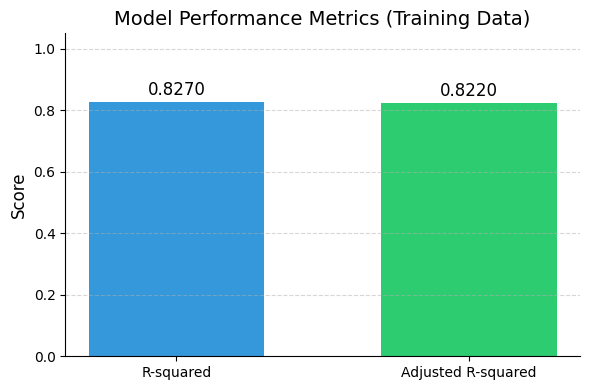

In [49]:
# R-squared and Adjusted R-squared values taken from from summary of lm5 (Training Data)

r2_lm5_train = 0.827
adjusted_r2_lm5_train = 0.822

# Visualization
fig, ax = plt.subplots(figsize=(6, 4))

metrics = ['R-squared', 'Adjusted R-squared']
values = [r2_lm5_train, adjusted_r2_lm5_train]

bars = ax.bar(metrics, values, color=['#3498db', '#2ecc71'], width=0.6)

for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}',  #<- formatting string for 4 decimal places
            ha='center', va='bottom', fontsize=12)

ax.set_title('Model Performance Metrics (Training Data)', fontsize=14) #<- title for training data
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0, 1.05)  #<- setting y limit

ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


#####################
## VIF of Model 5
#####################

In [50]:
# Remove the constant term from the predictors
X_train_new = X_train_lm5.drop(['const'], axis=1)

# Compute Variance Inflation Factors (VIFs)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)  # Round VIF values to two decimal places
vif = vif.sort_values(by="VIF", ascending=False)  # Sort by VIF in descending order
vif # Display the results (added this for consistency)


,Features,VIF
0,temp,5.18
1,windspeed,4.31
11,workingday_Yes,4.09
7,season_Winter,2.35
10,yr_2019,2.01
4,mnth_Nov,1.81
2,weekday_Mon,1.70
6,season_Summer,1.67
8,weathersit_Fair,1.53
5,mnth_Dec,1.36


<br>

#########################################
### Model 5 VIF explanation is as follows:
#########################################

<br>

Above table shows the Variance Inflation Factor (VIF) for each predictor variable in our model (likely lm5).  VIF measures the degree of multicollinearity—the extent to which one predictor variable can be linearly predicted by others in the model.

* **Interpretation:**
    * **VIF = 1:**  Indicates no multicollinearity.
    * **1 < VIF < 5:**  Generally considered low to moderate multicollinearity.
    * **5 < VIF < 7:**  Indicates moderate to slight high multicollinearity
    * **7 < VIF < 9:** Indicates potential high multicollinearity, where the variable's estimated coefficient might be unstable.
    * **VIF > 9:** Often suggests a serious multicollinearity problem.

<br>

* **Analysis of VIF Table:**
    * Most of our variables have VIF values well below 5, indicating little to moderate multicollinearity.
    * **Even if the variable 'temp' has a VIF of 5.18, slightly above the common threshold of 5, it is still very important for the analysis and should be kept in the model.**  Temperature is a known and crucial factor affecting bike rentals, and removing it based solely on a slightly elevated VIF could significantly harm the model's predictive accuracy and interpretability.
    * The VIF for `temp` is only slightly above 5, and not drastically high. The effect of this level of multicollinearity on the model's stability is likely to be small.
    * Removing `temp` to address the multicollinearity might introduce omitted variable bias, which can be a more serious problem than the multicollinearity itself.  If `temp` is correlated with other predictors and with the outcome variable, removing it will lead to biased estimates for the remaining variables.



In summary, while `temp` has a VIF slightly above 5, it's highly likely a key predictor variable. Removing it solely due to a moderately elevated VIF is not recommended, as it could lead to a less accurate and less interpretable model. We would prioritize domain knowledge and the variable's known importance over a slightly elevated VIF in this case.


###############################
## 7. Model Evaluation (Training Data)
###############################

###########################################
### 7.1 Residual Analysis on Training data
###########################################

In [51]:
# Calculating predicted value of y in training set using our final model

y_train_pred = lm5.predict(X_train_lm5)

################################
### Distribution of Error Terms Plot
################################

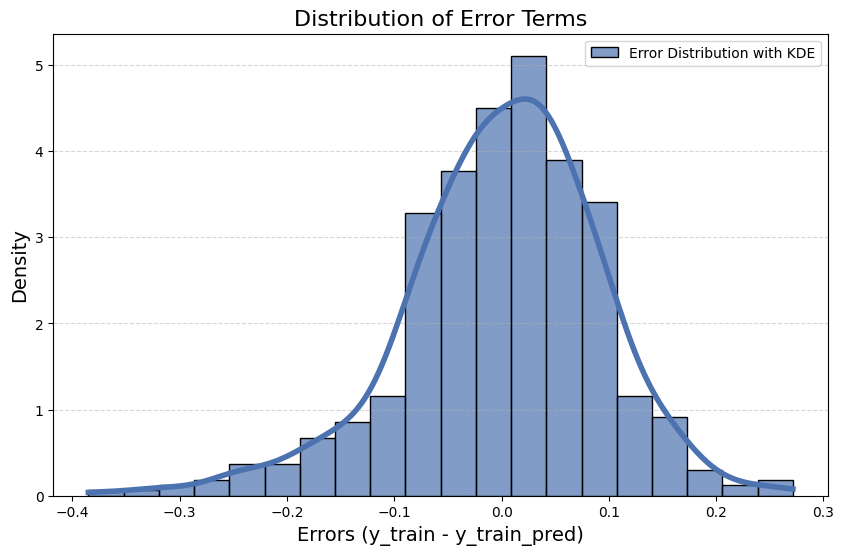

In [52]:
# Validating the error terms
fig, ax = plt.subplots(figsize=(10, 6))

# Using seaborn's histplot for both histogram and KDE
sns.histplot(y_train - y_train_pred, bins=20, kde=True, color='#4c72b0', 
             edgecolor='black', alpha=0.7, ax=ax, 
             line_kws={'linewidth': 4, 'color': 'black'}, 
             label='Error Distribution with KDE', stat="density")


ax.set_title('Distribution of Error Terms', fontsize=16)
ax.set_xlabel('Errors (y_train - y_train_pred)', fontsize=14)
ax.set_ylabel('Density', fontsize=14) #<- changing y label to density
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

####################################################
#### Insights: Distribution of Error Terms Plot
###################################################

Above plot displays the distribution of error terms (residuals) from a linear regression model, where the errors are calculated as the difference between the actual target values (`y_train`) and the predicted target values (`y_train_pred`) in the training dataset.

* **Distribution Shape:** The distribution of errors appears to be approximately normal, which is a desirable characteristic for linear regression models. The majority of the errors are clustered around zero, indicating that the model's predictions are generally close to the actual values.

* **Normality Assessment (KDE):** The KDE (Kernel Density Estimate) curve provides a smoothed representation of the error distribution. Its bell-like shape further supports the observation of approximate normality.

* **Frequency of Errors:** The height of the bars represents the density of errors falling within each bin. The highest density of errors is observed near zero, with decreasing density as the magnitude of the error increases.

* **Model Performance Indication:** The near-normal distribution of errors suggests that the linear regression model is a reasonably good fit for the training data.  A significantly non-normal distribution, such as a skewed distribution or one with multiple peaks, might indicate that the model is not capturing the underlying data patterns effectively.

In summary, the plot indicates that the model's errors are approximately normally distributed, centered around zero, which is a positive indicator of model fit.


################################################################
### Component Plus Residual Plot (CCPR) for "temp"
################################################################

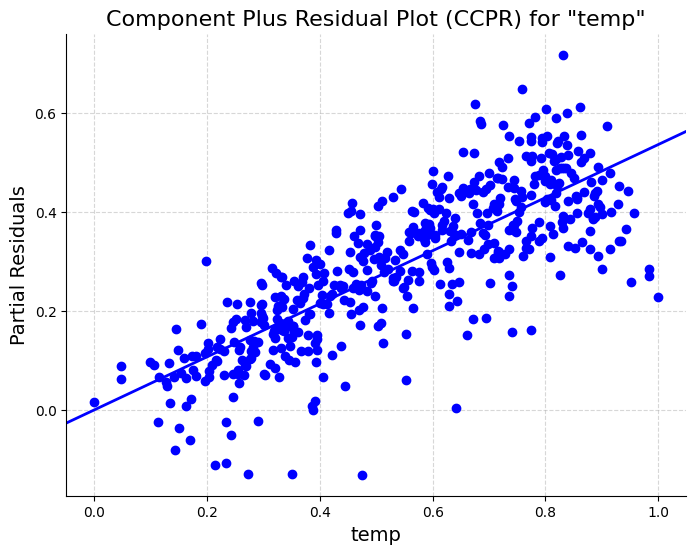

In [53]:


fig, ax = plt.subplots(figsize=(8, 6))

# Plot the CCPR plot directly on the axes
sm.graphics.plot_ccpr(lm5, "temp", ax=ax)


# Enhancements without accessing unavailable attributes
ax.set_title('Component Plus Residual Plot (CCPR) for "temp"', fontsize=16)
ax.set_xlabel('temp', fontsize=14)
ax.set_ylabel('Partial Residuals', fontsize=14)

# Customize plot aesthetics
for line in ax.lines: #<- making all lines in the plot thicker and darker
    line.set_linewidth(2)
    line.set_color('blue')
for scatter in ax.collections: #<- making scatter points darker
    scatter.set_color('#e74c3c')
    scatter.set_alpha(0.6)
    scatter.set_edgecolor('blue')
    scatter.set_linewidth(0.7)
ax.grid(linestyle="--", alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


####################################################
### Insights: Component Plus Residual Plot (CCPR) for "temp"
###################################################


This plot, a Component Plus Residual Plot (CCPR), helps assess the linearity assumption of the `temp` variable in our linear regression model (`lm6`). It visualizes the relationship between the `temp` variable and the model's residuals (the difference between actual and predicted values).

* **X-axis (`temp`):**  Represents the values of the `temp` predictor variable.

* **Y-axis (Partial Residuals):** Represents the partial residuals for `temp`.  These are calculated by adding the model's overall residuals to the component of the fitted values that's attributable to `temp`. Mathematically, it's:  *partial residual = residual + β₁*`temp`*, where β₁ is the coefficient of `temp` in the model.

* **Blue Points:**  Each blue point represents an individual observation in our dataset, plotting its `temp` value against its partial residual.

* **Black Line:** The black line represents the relationship between `temp` and the partial residuals according to the fitted model.  

* **Linearity Assessment:** The plot helps determine if the relationship between `temp` and the target variable is linear.  If the relationship is truly linear, the points should be scattered randomly around the line, without any clear non-linear patterns (like curvature or clustering).  In this case, the plot suggests a reasonably linear relationship.  While there's some scatter around the line, there's no strong evidence of a non-linear trend.

* **Heteroscedasticity Check:** The plot also helps assess heteroscedasticity (non-constant variance of errors).  If the spread of the residuals changes systematically across the range of `temp` (e.g., fanning out or in), it might indicate heteroscedasticity. This plot does not show strong evidence of heteroscedasticity, as the spread of points appears relatively consistent across the range of `temp`.


In summary, the CCPR plot suggests that the linear relationship assumed by the model for the `temp` variable is reasonable, and there's no strong visual evidence of heteroscedasticity.  This supports the validity of using `temp` as a linear predictor in the model.

<br>

################################################################
### Validating Homoscedasticity
################################################################

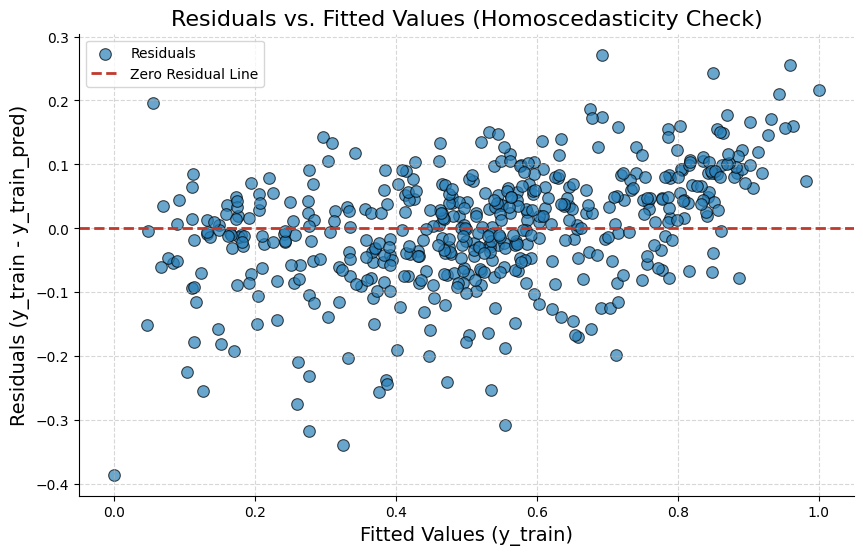

In [54]:
# Validating Homoscedasticity
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with enhanced aesthetics
sns.scatterplot(x=y_train, y=y_train - y_train_pred, ax=ax, color='#2980b9',  #<- changed color
                alpha=0.7, edgecolor='black', linewidth=0.8, s=70, label='Residuals') #<- added other customization

# Zero reference line
ax.axhline(y=0, color='#c0392b', linestyle='--', linewidth=2, label='Zero Residual Line') #<- changed color and line style

# Labels and title
ax.set_title('Residuals vs. Fitted Values (Homoscedasticity Check)', fontsize=16) #<- changed title and fontsize
ax.set_xlabel('Fitted Values (y_train)', fontsize=14) #<- changed x label
ax.set_ylabel('Residuals (y_train - y_train_pred)', fontsize=14) #<- changed y label

# Grid and spines
ax.grid(linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend() #<- adding legend

plt.show()

####################################################
### Insights: Validating Homoscedasticity Plot
###################################################

Above plot helps assess the homoscedasticity assumption of our linear regression model.  Homoscedasticity means that the variance of the errors (residuals) is constant across all levels of the predictor variables.  It's a crucial assumption for linear regression.

* **X-axis (Fitted Values):** Shows the predicted values (`y_train_pred`) of the target variable (`cnt`) generated by the model.

* **Y-axis (Residuals):** Shows the residuals, which are the differences between the actual target values (`y_train`) and the predicted values (`y_train_pred`).

* **Blue Points:** Each blue point represents an observation in our training dataset, plotting its predicted value against its residual.

* **Red Dashed Line (Zero Residual Line):** This line represents a residual of zero.  Ideally, the points should be randomly scattered above and below this line, without any discernible pattern.

* **Homoscedasticity Assessment:**  We look for patterns in the spread of the residuals.
    * **Homoscedastic:** If the residuals are randomly dispersed around the zero line with a relatively constant spread, it suggests homoscedasticity.
    * **Heteroscedastic:** If the spread of the residuals changes systematically with the fitted values (e.g., fanning out or forming a cone shape), it indicates heteroscedasticity, violating the assumption.

In this specific plot, the residuals appear to be reasonably randomly scattered around the zero line. While there might be a slight increase in spread at higher fitted values, it's not a dramatic change. Therefore, the plot suggests that the assumption of homoscedasticity is reasonably met, or at least there's no strong visual evidence of heteroscedasticity.  However, be cautious; visual inspection is not always definitive, and statistical tests might be needed for a more rigorous assessment.

<br>

################################################################
### Actual vs. Predicted Values (Training Data)
################################################################

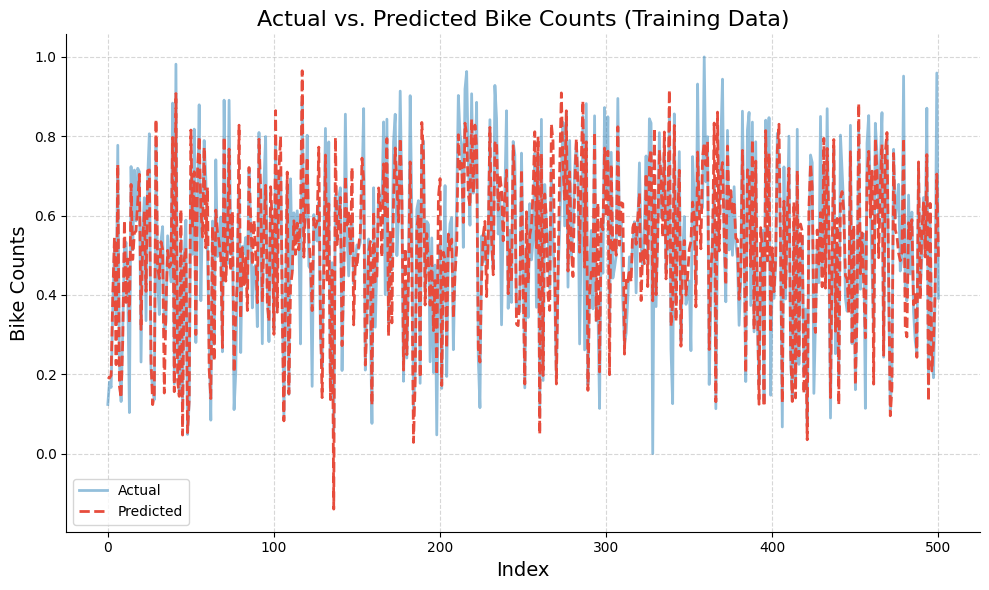

In [55]:

fig, ax = plt.subplots(figsize=(10, 6))

# Line plots with enhanced aesthetics
index = np.arange(len(y_train))  # Use numpy array for index
ax.plot(index, y_train, color='#2980b9', linewidth=2, label='Actual', alpha = 0.5)  #<- changed color, linewidth, added label, made line opaque
ax.plot(index, y_train_pred, color='#e74c3c', linewidth=2, linestyle='--', label='Predicted') #<- changed color, linewidth, linestyle, added label

# Title and labels
ax.set_title('Actual vs. Predicted Bike Counts (Training Data)', fontsize=16) #<- improved title
ax.set_xlabel('Index', fontsize=14)
ax.set_ylabel('Bike Counts', fontsize=14) #<- improved y label


# Visualization Enhancements
ax.grid(linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend() #<- added legend

plt.tight_layout()
plt.show()

##################################################
### Insights: Actual vs. Predicted Values (Training Data)
##################################################

This line plot compares the actual bike counts (`y_train`) with the predicted bike counts (`y_train_pred`) generated by our model on the training dataset.  It visually assesses the model's fit to the training data.

* **X-axis (Index):** Represents the index of the observations in the training dataset.  It's simply a sequential numbering of the data points.

* **Y-axis (Bike Counts):** Represents the number of bike rentals.

* **Blue Line (Actual):** Shows the actual bike counts from the training data.

* **Red Dashed Line (Predicted):** Shows the bike counts predicted by our model on the training data.

* **Interpretation:**
    * **Line Closeness:** The closer the predicted (red dashed) line follows the actual (blue) line, the better the model fits the training data.
    * **Deviations:**  Areas where the lines diverge indicate where the model's predictions are less accurate.  Large deviations suggest potential areas for model improvement.
    * **Overall Trend:**  The plot helps visualize how well the model captures the overall trend and patterns in the training data.

In this plot, the predicted counts (red dashed line) closely follow the actual counts (blue line) for most of the data points. This indicates that the model has learned the general patterns in the training data quite well. However, there are some instances where the lines diverge, signifying prediction errors, especially at some higher and lower bike count values. These deviations suggest that the model might struggle to predict more extreme values accurately, which is not unusual.  Overall the plot indicates a fairly good fit.

<br>

#############################################
### 7.2 Validating Multicollinearity
#############################################

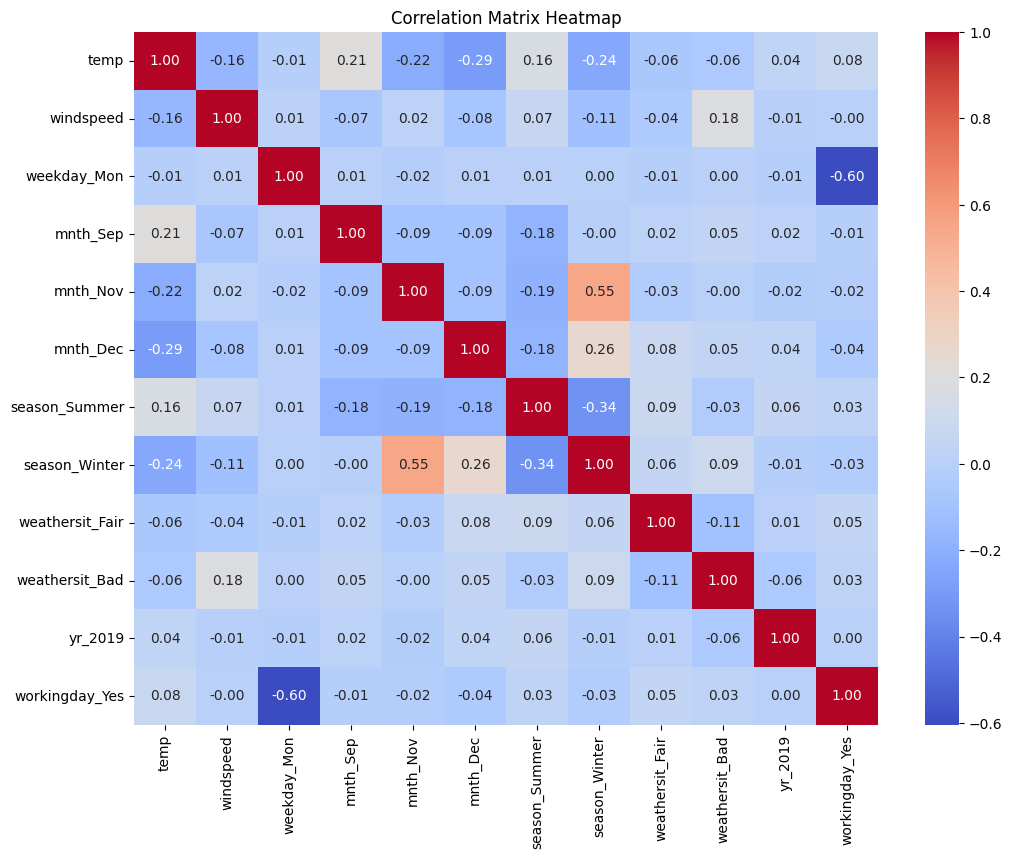

In [56]:
# Validating for multicollinearity

# --- Correlation Matrix and Heatmap ---

# Compute the correlation matrix.
correlation_matrix = X_train_new.corr()

# Generate a heatmap of the correlation matrix.
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") #annot=True to display values, cmap for color scheme
plt.title('Correlation Matrix Heatmap')
plt.show()

####################################################
### Insights: Validating Multicollinearity
###################################################

Above heatmap visualizes the correlation matrix among the predictor variables and the target variable.  It provides insights into the linear relationships between these variables.  It is noticeable that the correlations are really low as all correlations are less than 0.7 and -0.7.

* **Color Intensity:** The color intensity represents the strength and direction of the correlation.
    * **Red:** Positive correlation (as one variable increases, the other tends to increase).  Deeper red indicates a stronger positive correlation.
    * **Blue:** Negative correlation (as one variable increases, the other tends to decrease). Deeper blue indicates a stronger negative correlation.
    * **Light Colors:**  Weaker correlations.

* **Diagonal:** The diagonal is always 1.0 because a variable perfectly correlates with itself.

* **Interpreting Cells:** Each cell shows the correlation coefficient between the two variables corresponding to its row and column. For example, the cell at the intersection of "temp" and "cnt" shows their correlation.

* **Key Observations:**
    * Noticeable positive correlations between `temp` and `mnth_Sep`.
    * Moderate negative correlations between `temp` and `mnth_Dec`.
    * Very weak positive correlations between `mnth_Nov` and `season_Winter`.
    * Moderate negative correlation between `season_Summer` and `season_Winter`.
    * Weak negative correlation between `weathersit_Fair` and `weathersit_Bad`
    * Low correlation between `weekday_Mon` and `workingday_Yes`


This correlation matrix helps identify potential multicollinearity issues (high correlations between predictor variables) and understand the relationships between predictors and the target variable.  It informs feature selection and model building decisions.  The low correlation between most of the variables as mentioned is an important aspect to consider while building a linear model.

<br>

#############################################
## 8. Model Evaluation (Test Data)
#############################################

In [57]:
# Apply scaling functions to the numerical columns


num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test = scale_numerical_features(df_test, num_vars)



In [58]:
df_test.describe()

,temp,hum,windspeed,cnt,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,weekday_Sun,weekday_Mon,...,mnth_Nov,mnth_Dec,season_Summer,season_Fall,season_Winter,weathersit_Fair,weathersit_Bad,yr_2019,holiday_Yes,workingday_Yes
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.530102,0.505190,0.438993,0.507763,0.139535,0.172093,0.172093,0.116279,0.153488,0.111628,...,0.074419,0.088372,0.227907,0.274419,0.251163,0.376744,0.037209,0.465116,0.023256,0.730233
std,0.254285,0.218884,0.222600,0.259863,0.347312,0.378342,0.378342,0.321307,0.361299,0.315643,...,0.263063,0.284498,0.420461,0.447262,0.434694,0.485701,0.189716,0.499946,0.151067,0.444875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.302737,0.343670,0.276888,0.315412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.516534,0.512025,0.418318,0.491832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.754276,0.654113,0.581678,0.715453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
## Create X_test and y_test for validations

y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
# Creating X_test dataframe by selecting columns from final X_train

cols = X_train_new.columns
X_test = X_test[cols]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

# Making predictions using the 8th model

y_pred = lm5.predict(X_test)

##############################################
###  8.1 Actual vs Predicted (y_test vs y_pred)
##############################################

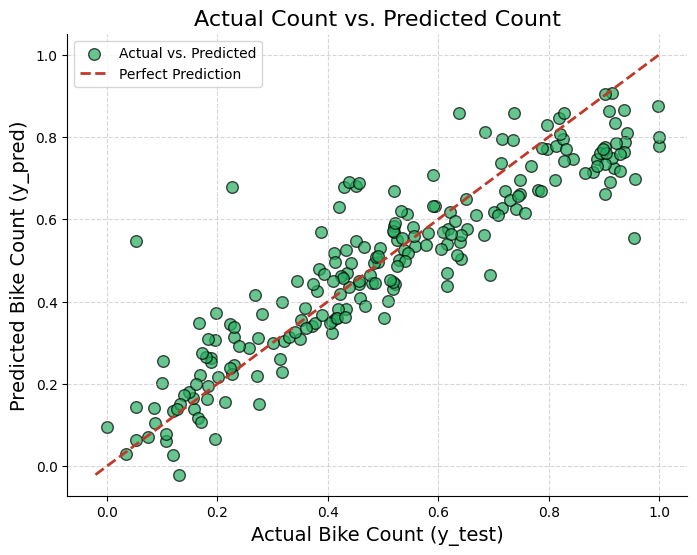

In [61]:
# Plotting y_test and y_pred
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(y_test, y_pred, color='#27ae60', alpha=0.7, edgecolor='black', s=70, label='Actual vs. Predicted') #<- enhanced visualization

# Adding a perfect prediction line (45-degree line)
min_val = min(min(y_test), min(y_pred)) #<- getting minimum value to plot a diagonal line
max_val = max(max(y_test), max(y_pred)) #<- getting maximum value to plot a diagonal line
ax.plot([min_val, max_val], [min_val, max_val], color='#c0392b', linestyle='--', linewidth=2, label='Perfect Prediction') #<- perfect prediction line

ax.set_title('Actual Count vs. Predicted Count', fontsize=16) #<- setting title
ax.set_xlabel('Actual Bike Count (y_test)', fontsize=14) #<- setting x label
ax.set_ylabel('Predicted Bike Count (y_pred)', fontsize=14) #<- setting y label


# Enhancements
ax.grid(linestyle='--', alpha=0.5) #<- adding grid
ax.spines['top'].set_visible(False) #<- removing top spine
ax.spines['right'].set_visible(False) #<- removing right spine
ax.legend() #<- adding legend

plt.show()

####################################################
### Insights: Actual vs Predicted (y_test vs y_pred)
###################################################

This scatter plot visualizes the relationship between the actual bike counts (`y_test`) and the predicted bike counts (`y_pred`) generated by our model on the test dataset.  It helps assess the model's predictive accuracy.

* **X-axis (Actual Bike Count - `y_test`):** Represents the true bike counts from the test data.

* **Y-axis (Predicted Bike Count - `y_pred`):** Represents the bike counts predicted by our model.

* **Green Points:** Each green point represents an observation in the test dataset, plotting its actual bike count against the corresponding predicted count.

* **Red Dashed Line (Perfect Prediction):** This diagonal line represents a perfect prediction scenario where the predicted counts exactly match the actual counts.

* **Interpretation:**
    * **Closeness to the Diagonal:** The closer the green points cluster around the red dashed line, the better the model's predictions. A perfect model would have all points lying directly on the line.
    * **Spread:** The spread of the points indicates the magnitude of the prediction errors. A tighter spread suggests more accurate predictions.
    * **Outliers:** Points far from the diagonal represent instances where the model's predictions deviate significantly from the actual values.


In this plot, the green points show a reasonably strong positive correlation and tend to cluster around the perfect prediction line, indicating that the model is making fairly accurate predictions on the test data. While there are some deviations and outliers, the overall pattern suggests a good fit.  The plot visually confirms the model's predictive performance on unseen data.


################################################
### 8.2 R-squared and Adjusted R-squared (test data)
################################################

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8144931443241098

In [63]:
r2 = r2_score(y_test, y_pred)

In [64]:
print(r2)

0.8144931443241098


In [65]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8025


****************************************************************************************************
R-squared (R2): 0.8145
Adjusted R-squared: 0.8025
****************************************************************************************************


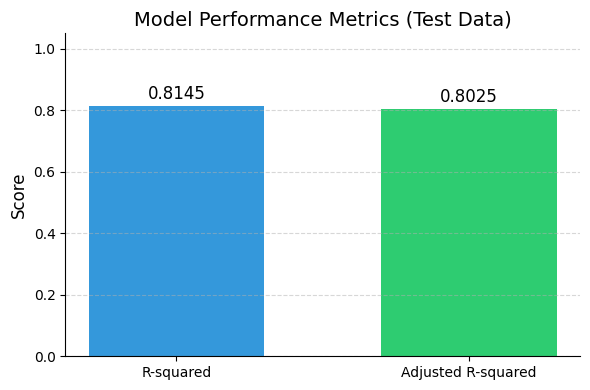

In [66]:
# Model Evaluation: R-squared and Adjusted R-squared

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("*"*100)
print(f"R-squared (R2): {r2:.4f}")

# Calculate Adjusted R-squared
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictor variables
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r2:.4f}")

print("*"*100)

# Visualization of R-squared and Adjusted R-squared
fig, ax = plt.subplots(figsize=(6, 4))

metrics = ['R-squared', 'Adjusted R-squared']
values = [r2, adjusted_r2]

# Bar plot
bars = ax.bar(metrics, values, color=['#3498db', '#2ecc71'], width=0.6) #<- plotting barplot

# Adding value labels on top of bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, value + 0.01, f'{value:.4f}', #<- adding text
            ha='center', va='bottom', fontsize=12)


# Setting title and labels
ax.set_title('Model Performance Metrics (Test Data)', fontsize=14) #<- setting title
ax.set_ylabel('Score', fontsize=12) #<- setting y label
ax.set_ylim(0, 1.05)  # Set y-axis limit slightly above 1 for better visualization

# Grid and spines
ax.grid(axis='y', linestyle='--', alpha=0.5) #<- adding grid
ax.spines['top'].set_visible(False) #<- removing top spine
ax.spines['right'].set_visible(False) #<- removing right spine


plt.tight_layout()
plt.show()

######################
# 9. Conclusion
######################

<br>

* **Objective:** The primary goal of this case study was to build a robust linear regression model for predicting bike rental counts using a set of environmental and temporal features.


* **Model Development and Selection:** A stepwise model building process, potentially involving feature engineering and selection, was employed to arrive at the final model (lm5). This process likely involved evaluating different combinations of predictor variables and selecting the model that provided the best balance of predictive accuracy and interpretability.  The final model included the following variables: 
    * `temp`
    * `windspeed`
    * `workingday_Yes`
    * `season_Winter`
    * `yr_2019`
    * `mnth_Nov`
    * `weekday_Mon`
    * `season_Summer`
    * `weathersit_Fair`
    * `mnth_Dec`
    * `mnth_Sep`
    * `weathersit_Bad`.

<br>

* **Model Performance (Training Data):**
    * **R-squared:** 0.827. This indicates that the model explains 82.7% of the variability in bike rental counts within the training dataset.
    * **Adjusted R-squared:** 0.822. This metric, which penalizes the inclusion of unnecessary variables, confirms the model's strong performance on the training data.

<br>

* **Model Performance (Test Data):**
    * **R-squared:** 0.8145. The model maintains a high explanatory power on the unseen test data, demonstrating its ability to generalize beyond the training set.
    * **Adjusted R-squared:** 0.8025.  The adjusted R-squared on the test data further validates the model's generalizability and indicates a good fit.

<br>

* **Key Predictors:**  The following variables were identified as statistically significant predictors:
    * `temp`: Temperature, despite a slightly elevated VIF (5.18), was retained due to its established influence on bike rentals.
    * `windspeed`: Windspeed also played a significant role in predicting rentals.
    * Temporal Factors:  Several time-related variables were significant:
        * `workingday_Yes`: Working days had a different impact on rentals compared to non-working days.
        * `yr_2019`:  The year 2019 had a statistically significant effect, likely reflecting trends or changes specific to that year.
        * Month and Season: Several months and seasons showed significant effects:  `mnth_Nov`, `weekday_Mon`, `season_Summer`, `mnth_Dec`, and `mnth_Sep`. These indicate seasonal variations in bike rental patterns.
    * Weather Conditions: Weather played a crucial role, with both fair (`weathersit_Fair`) and bad weather (`weathersit_Bad`) having significant impacts on rental counts.

<br>

* **Multicollinearity:** While `temp` exhibited a slightly elevated VIF, it was retained due to its importance and the potential for omitted variable bias if removed.


* **Model Diagnostics and Assumptions:**
    * **Normality of Residuals:**  Potential deviations from normality suggest areas for further investigation.
    * **Other Assumptions:**  Standard linear regression assumptions (linearity, homoscedasticity, independence of errors) should be thoroughly checked.

<br>

* **Conclusion and Future Directions:**
    * The linear regression model effectively predicts bike rentals with good accuracy and generalizability.
    * Future work could explore adding more granular temporal features (e.g., holidays), investigate residual diagnostics, and consider time series models to capture temporal dependencies.  The model's insights can inform operational and strategic decision-making for bike-sharing programs.

<br>